# Data Processing & Cleaning
### Datasets Used:
> 2015 UNData: (2015 is the only year where all variables are reported, since the World Happiness Report started in 2012) 
> - Population, surface area and density  
> - Population in the capital city, urban and rural areas    
> - GDP and GDP per capita    
> - GVA by kind of economic activity  
> - Education at the primary, secondary and tertiary levels  
> - Employment by economic activity  
> - Water supply and sanitation coverage  
> - Internet usage  
> - Population growth, fertility, life expectancy and mortality
>
> Source: https://data.un.org/

> 2017 UNData:
> - Country Statistics - UNData  
>
> Source: https://www.kaggle.com/datasets/sudalairajkumar/undata-country-profiles

> World Happiness Report 2015 & 2017:  
Source: https://www.kaggle.com/datasets/unsdsn/world-happiness  

### Per Preliminary Test Conclusion:
> We will be using these variables as UNData - Country Statistics
> - Individuals using the Internet (per 100 inhabitants) - 0.804678
> - Education: Secondary gross enrol. ratio (female per 100 pop.) - 0.798637
> - Education: Secondary gross enrol. ratio (male per 100 pop.) - 0.789858
> - Life expectancy at birth (males, years) - 0.788123
> - Life expectancy at birth (females, years) - 0.777025
> - Employment: Services (% of employed) - 0.759955
> - Employment: Agriculture (% of employed) - -0.741803
> - Infant mortality rate (per 1000 live births - -0.720670
> - GDP per capita (current US$) - 0.720294
> - Education: Tertiary gross enrol. ratio (female per 100 pop.) - 0.709908
> - Pop. using improved sanitation facilities (rural, %) - 0.708278
> - Population age distribution (0-14 years, %) - -0.706546
> - Pop. using improved sanitation facilities (urban, %) - 0.686632
> - Urban population (% of total population) - 0.685855
> - Fertility rate, total (live births per woman) - -0.665216
> - Education: Tertiary gross enrol. ratio (male per 100 pop.) - 0.628309
> - Economy: Agriculture (% of GVA) - -0.623445
> - Pop. using improved drinking water (rural, %) - 0.619957
> - Population age distribution (60+ years, %) - 0.600639
> - Pop. using improved drinking water (urban, %) - 0.499377 (Included for completeness with rural %)

> In addition, for completeness in Exploratory Data Analysis, we will also be using these variables:
> - Employment: Industry (% of employed) 
> - Education: Primary gross enrol. ratio (male per 100 pop.) 
> - Education: Primary gross enrol. ratio (female per 100 pop.)  

---
### Essential Libraries

Importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

---
### Country Statistics - UNData 2015

#### Variable: `Individuals using the Internet (per 100 inhabitants)`
> File name: Internet_Usage.csv

In [2]:
# Create dataframe
Internet_Usage = pd.read_csv('Internet_Usage.csv', encoding = "ISO-8859-1")

# Actual column names are in row 2 (index 1)
new_header = Internet_Usage.iloc[0] # grab the first row for the header
Internet_Usage = Internet_Usage[1:] # take the data less the header row
Internet_Usage.columns = new_header # set the header row as the df header
Internet_Usage

,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
1,1,"Total, all countries or areas",2000,Percentage of individuals using the internet,6.5,NaN,"International Telecommunication Union (ITU), G..."
2,1,"Total, all countries or areas",2005,Percentage of individuals using the internet,16.8,NaN,"International Telecommunication Union (ITU), G..."
3,1,"Total, all countries or areas",2010,Percentage of individuals using the internet,29.3,NaN,"International Telecommunication Union (ITU), G..."
4,1,"Total, all countries or areas",2015,Percentage of individuals using the internet,41.1,NaN,"International Telecommunication Union (ITU), G..."
5,1,"Total, all countries or areas",2017,Percentage of individuals using the internet,46.3,NaN,"International Telecommunication Union (ITU), G..."
...,...,...,...,...,...,...,...
1353,716,Zimbabwe,2000,Percentage of individuals using the internet,0.4,Estimate.,"International Telecommunication Union (ITU), G..."
1354,716,Zimbabwe,2005,Percentage of individuals using the internet,2.4,Estimate.,"International Telecommunication Union (ITU), G..."
1355,716,Zimbabwe,2010,Percentage of individuals using the internet,6.4,Estimate.,"International Telecommunication Union (ITU), G..."
1356,716,Zimbabwe,2015,Percentage of individuals using the internet,22.7,Estimate.,"International Telecommunication Union (ITU), G..."


In [3]:
Internet_Usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 1 to 1357
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Region/Country/Area  1357 non-null   object
 1   nan                  1357 non-null   object
 2   Year                 1357 non-null   object
 3   Series               1357 non-null   object
 4   Value                1357 non-null   object
 5   Footnotes            599 non-null    object
 6   Source               1357 non-null   object
dtypes: object(7)
memory usage: 74.3+ KB


> Rename 2nd column from `nan` to `country`

In [4]:
cols = list(Internet_Usage.columns)
cols[1] = 'country'
Internet_Usage.columns = cols

> Drop rows with data of continents or regions

In [5]:
continents = ['Total, all countries or areas', 'Northern Africa', 'Sub-Saharan Africa', 'Eastern Africa', 
              'Middle Africa', 'Southern Africa', 'Western Africa', 'Northern America', 
              'Latin America & the Caribbean', 'Caribbean', 'Latin America', 'Asia', 'Central Asia', 
              'Eastern Asia', 'South-central Asia', 'South-eastern Asia', 'Southern Asia', 'Western Asia', 
              'Europe', 'Oceania', 'Australia and New Zealand', 'Africa', 'Americas', 'Central America', 
              'South America', 'Caucasus', 'Melanesia', 'Micronesia', 'Polynesia']
for i in continents:
    Internet_Usage= Internet_Usage[Internet_Usage['country'].str.contains(i)==False]

> Keep only data from 2015

In [6]:
Internet_Usage= Internet_Usage[Internet_Usage['Year'].str.contains('2015')!=False]

> Rename value to the correct variable name and select only required variables

In [7]:
Internet_Usage = Internet_Usage.rename(columns={'Value': 'Individuals using the Internet (per 100 inhabitants)'})
Internet_Usage = pd.DataFrame(Internet_Usage[['country', 'Individuals using the Internet (per 100 inhabitants)']])
Internet_Usage

,country,Individuals using the Internet (per 100 inhabitants)
150,Afghanistan,8.3
155,Albania,63.3
161,Algeria,38.2
167,Andorra,96.9
172,Angola,12.4
...,...,...
1330,Venezuela (Boliv. Rep. of),64
1335,Viet Nam,45
1345,Yemen,24.1
1350,Zambia,21


---
#### Employment
#### Variables: `Employment: Industry (% of employed)`, `Employment: Services (% of employed)`, 
#### `Employment: Agriculture (% of employed)`
> File name: Employment.csv

In [8]:
# Create dataframe
Employment = pd.read_csv('Employment.csv', encoding = "ISO-8859-1")

# Actual column names are in row 2 (index 1)
new_header = Employment.iloc[0] # grab the first row for the header
Employment = Employment[1:] # take the data less the header row
Employment.columns = new_header # set the header row as the df header
Employment

,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
1,1,"Total, all countries or areas",2005,Employment by industry: Agriculture (%) Male a...,37.0,Estimate.,"International Labour Organization (ILO), Genev..."
2,1,"Total, all countries or areas",2005,Employment by industry: Industry (%) Male and ...,21.2,Estimate.,"International Labour Organization (ILO), Genev..."
3,1,"Total, all countries or areas",2005,Employment by industry: Services (%) Male and ...,41.8,Estimate.,"International Labour Organization (ILO), Genev..."
4,1,"Total, all countries or areas",2005,Employment by industry: Agriculture (%) Male,37.3,Estimate.,"International Labour Organization (ILO), Genev..."
5,1,"Total, all countries or areas",2005,Employment by industry: Industry (%) Male,24.2,Estimate.,"International Labour Organization (ILO), Genev..."
...,...,...,...,...,...,...,...
7961,97,European Union (EU),2020,Employment by industry: Industry (%) Male,33.7,Estimate.,"International Labour Organization (ILO), Genev..."
7962,97,European Union (EU),2020,Employment by industry: Services (%) Male,61.6,Estimate.,"International Labour Organization (ILO), Genev..."
7963,97,European Union (EU),2020,Employment by industry: Agriculture (%) Female,2.7,Estimate.,"International Labour Organization (ILO), Genev..."
7964,97,European Union (EU),2020,Employment by industry: Industry (%) Female,11.9,Estimate.,"International Labour Organization (ILO), Genev..."


In [9]:
Employment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7965 entries, 1 to 7965
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Region/Country/Area  7965 non-null   object
 1   nan                  7965 non-null   object
 2   Year                 7965 non-null   object
 3   Series               7965 non-null   object
 4   Value                7965 non-null   object
 5   Footnotes            5508 non-null   object
 6   Source               7965 non-null   object
dtypes: object(7)
memory usage: 435.7+ KB


> Rename 2nd column from `nan` to `country`

In [10]:
cols = list(Employment.columns)
cols[1] = 'country'
Employment.columns = cols

> Drop rows with data of continents or regions

In [11]:
for i in continents:
    Employment = Employment[Employment['country'].str.contains(i)==False]

> Keep only data from 2015 and split `Employment by industry: Services (%) Male and Female` and `Employment by industry: Agriculture (%) Male and Female` into separate dataframes

In [12]:
Employment = Employment[Employment['Year'].str.contains('2015')!=False]
Employment_Services = Employment.loc[Employment['Series'] == 'Employment by industry: Services (%) Male and Female']
Employment_Agriculture = Employment.loc[Employment['Series'] == 'Employment by industry: Agriculture (%) Male and Female']
Employment_Industry = Employment.loc[Employment['Series'] == 'Employment by industry: Industry (%) Male and Female']

#### Employment: Services (% of employed)
> Rename value to the correct variable name and select only required variables

In [13]:
Employment_Services = pd.DataFrame(Employment_Services[['country', 'Value']])
Employment_Services = Employment_Services.rename(columns={'Value': 'Employment: Services (% of employed)'})
Employment_Services

,country,Employment: Services (% of employed)
849,Afghanistan,35.8
885,Albania,40.0
921,Algeria,58.7
963,Angola,40.8
1026,Argentina,76.1
...,...,...
7770,Viet Nam,33.2
7806,Western Sahara,53.0
7842,Yemen,58.0
7878,Zambia,37.7


#### Employment: Agriculture (% of employed)
> Rename value to the correct variable name and select only required variables

In [14]:
Employment_Agriculture = pd.DataFrame(Employment_Agriculture[['country', 'Value']])
Employment_Agriculture = Employment_Agriculture.rename(columns={'Value': 'Employment: Agriculture (% of employed)'})
Employment_Agriculture

,country,Employment: Agriculture (% of employed)
847,Afghanistan,47.1
883,Albania,41.4
919,Algeria,10.3
961,Angola,50.6
1024,Argentina,0.3
...,...,...
7768,Viet Nam,44.0
7804,Western Sahara,21.9
7840,Yemen,29.2
7876,Zambia,51.7


#### Employment: Industry (% of employed)
> Rename value to the correct variable name and select only required variables

In [15]:
Employment_Industry = pd.DataFrame(Employment_Industry[['country', 'Value']])
Employment_Industry = Employment_Industry.rename(columns={'Value': 'Employment: Industry (% of employed)'})
Employment_Industry

,country,Employment: Industry (% of employed)
848,Afghanistan,17.0
884,Albania,18.6
920,Algeria,31.0
962,Angola,8.6
1025,Argentina,23.7
...,...,...
7769,Viet Nam,22.7
7805,Western Sahara,25.1
7841,Yemen,12.8
7877,Zambia,10.7


---
#### Variable: `GDP per capita (current US$)`
> File name: GDP.csv

In [16]:
# Create dataframe
GDP = pd.read_csv('GDP.csv', encoding = "ISO-8859-1")

# Actual column names are in row 2 (index 1)
new_header = GDP.iloc[0] # grab the first row for the header
GDP = GDP[1:] # take the data less the header row
GDP.columns = new_header # set the header row as the df header
GDP

,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
1,1,"Total, all countries or areas",1995,GDP in current prices (millions of US dollars),"31,140,783",NaN,"United Nations Statistics Division, New York, ..."
2,1,"Total, all countries or areas",2005,GDP in current prices (millions of US dollars),"47,623,151",NaN,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2010,GDP in current prices (millions of US dollars),"66,272,559",NaN,"United Nations Statistics Division, New York, ..."
4,1,"Total, all countries or areas",2015,GDP in current prices (millions of US dollars),"74,985,744",NaN,"United Nations Statistics Division, New York, ..."
5,1,"Total, all countries or areas",2017,GDP in current prices (millions of US dollars),"81,056,929",NaN,"United Nations Statistics Division, New York, ..."
...,...,...,...,...,...,...,...
6769,716,Zimbabwe,2010,GDP real rates of growth (percent),19.7,NaN,"United Nations Statistics Division, New York, ..."
6770,716,Zimbabwe,2015,GDP real rates of growth (percent),1.8,NaN,"United Nations Statistics Division, New York, ..."
6771,716,Zimbabwe,2017,GDP real rates of growth (percent),4.7,NaN,"United Nations Statistics Division, New York, ..."
6772,716,Zimbabwe,2018,GDP real rates of growth (percent),4.8,NaN,"United Nations Statistics Division, New York, ..."


In [17]:
GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6773 entries, 1 to 6773
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Region/Country/Area  6773 non-null   object
 1   nan                  6773 non-null   object
 2   Year                 6773 non-null   object
 3   Series               6773 non-null   object
 4   Value                6773 non-null   object
 5   Footnotes            169 non-null    object
 6   Source               6773 non-null   object
dtypes: object(7)
memory usage: 370.5+ KB


> Rename 2nd column from `nan` to `country`

In [18]:
cols = list(GDP.columns)
cols[1] = 'country'
GDP.columns = cols

> Drop rows with data of continents or regions

In [19]:
for i in continents:
    GDP = GDP[GDP['country'].str.contains(i)==False]

> Keep only data from 2015 and series is `GDP per capita (US dollars)`

In [20]:
GDP = GDP[GDP['Year'].str.contains('2015')!=False]
GDP = GDP.loc[GDP['Series'] == 'GDP per capita (US dollars)']

> Rename value to the correct variable name and select only required variables  

In [21]:
GDP = GDP.rename(columns={'Value': 'GDP per capita (current US$)'})
GDP = pd.DataFrame(GDP[['country', 'GDP per capita (current US$)']])

> Remove commas if value has 4 digits (e.g. 1,000 -> 1000)

In [22]:
GDP['GDP per capita (current US$)']=GDP['GDP per capita (current US$)'].str.replace(',','')
GDP

,country,GDP per capita (current US$)
851,Afghanistan,544
879,Albania,3939
907,Algeria,4178
935,Andorra,35748
963,Angola,4167
...,...,...
6644,Viet Nam,2085
6672,Yemen,1006
6700,Zambia,1314
6728,Zanzibar,821


---
#### Infant Mortality & Fertility
#### Variables: `Infant mortality rate (per 1000 live births`, `Fertility rate, total (live births per woman)`
> File name: Population_Fertility.csv

In [23]:
# Create dataframe
Infant = pd.read_csv('Population_Fertility.csv', encoding = "ISO-8859-1")

# Actual column names are in row 2 (index 1)
new_header = Infant.iloc[0] # grab the first row for the header
Infant = Infant[1:] # take the data less the header row
Infant.columns = new_header # set the header row as the df header
Infant

,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
1,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
3,1,"Total, all countries or areas",2010,"Infant mortality for both sexes (per 1,000 liv...",41.0,Data refers to a 5-year period preceding the r...,"United Nations Statistics Division, New York, ..."
4,1,"Total, all countries or areas",2010,"Maternal mortality ratio (deaths per 100,000 p...",248,NaN,"World Health Organization (WHO), the United Na..."
5,1,"Total, all countries or areas",2010,Life expectancy at birth for both sexes (years),68.9,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
...,...,...,...,...,...,...,...
4895,716,Zimbabwe,2020,Total fertility rate (children per women),3.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
4896,716,Zimbabwe,2020,"Infant mortality for both sexes (per 1,000 liv...",38.7,Data refers to a 5-year period preceding the r...,"United Nations Statistics Division, New York, ..."
4897,716,Zimbabwe,2020,Life expectancy at birth for both sexes (years),60.8,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
4898,716,Zimbabwe,2020,Life expectancy at birth for males (years),59.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."


In [24]:
Infant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4899 entries, 1 to 4899
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Region/Country/Area  4899 non-null   object
 1   nan                  4899 non-null   object
 2   Year                 4899 non-null   object
 3   Series               4899 non-null   object
 4   Value                4899 non-null   object
 5   Footnotes            4263 non-null   object
 6   Source               4899 non-null   object
dtypes: object(7)
memory usage: 268.0+ KB


> Rename 2nd column from `nan` to `country`

In [25]:
cols = list(Infant.columns)
cols[1] = 'country'
Infant.columns = cols

> Drop rows with data of continents or regions

In [26]:
for i in continents:
    Infant = Infant[Infant['country'].str.contains(i)==False]

> Keep only data from 2015 and split `Infant mortality for both sexes (per 1,000 live births)` and `Total fertility rate (children per women)` into separate dataframes

In [27]:
Infant = Infant[Infant['Year'].str.contains('2015')!=False]
Infant_Mortality = Infant.loc[Infant['Series'] == 'Infant mortality for both sexes (per 1,000 live births)']
Infant_Fertility = Infant.loc[Infant['Series'] == 'Total fertility rate (children per women)']

#### Infant mortality rate (per 1000 live births
> Rename value to the correct variable name and select only required variables

In [28]:
Infant_Mortality = pd.DataFrame(Infant_Mortality[['country', 'Value']])
Infant_Mortality = Infant_Mortality.rename(columns={'Value': 'Infant mortality rate (per 1000 live births'})
Infant_Mortality

,country,Infant mortality rate (per 1000 live births
634,Afghanistan,60.1
655,Albania,9.2
676,Algeria,24.9
703,Angola,78.2
727,Antigua and Barbuda,6.8
...,...,...
4804,Viet Nam,17.9
4827,Western Sahara,34.1
4846,Yemen,43.3
4867,Zambia,53.3


#### Fertility rate, total (live births per woman)
> Rename value to the correct variable name and select only required variables

In [29]:
Infant_Fertility = pd.DataFrame(Infant_Fertility[['country', 'Value']])
Infant_Fertility = Infant_Fertility.rename(columns={'Value': 'Fertility rate, total (live births per woman)'})
Infant_Fertility

,country,"Fertility rate, total (live births per woman)"
633,Afghanistan,5.4
654,Albania,1.7
675,Algeria,3.0
702,Angola,6.0
726,Antigua and Barbuda,2.0
...,...,...
4803,Viet Nam,2.0
4826,Western Sahara,2.6
4845,Yemen,4.4
4866,Zambia,5.2


---
#### Variables: `Urban population (% of total population)`
> File name: Population_Growth.csv

In [30]:
# Create dataframe
Upop = pd.read_csv('Population_Growth.csv', encoding = "ISO-8859-1")

# Actual column names are in row 2 (index 1)
new_header = Upop.iloc[0] # grab the first row for the header
Upop = Upop[1:] # take the data less the header row
Upop.columns = new_header # set the header row as the df header
Upop

,Region/Country/Area,NaN,Year,Series,Capital City,Capital City footnote,Value,Footnotes,Source
1,1,"Total, all countries or areas",2005,Urban population (percent),NaN,NaN,49.2,NaN,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2005,Urban population (percent growth rate per annum),NaN,NaN,2.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
3,1,"Total, all countries or areas",2005,Rural population (percent growth rate per annum),NaN,NaN,0.3,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
4,1,"Total, all countries or areas",2010,Urban population (percent),NaN,NaN,51.7,NaN,"United Nations Population Division, New York, ..."
5,1,"Total, all countries or areas",2010,Urban population (percent growth rate per annum),NaN,NaN,2.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
...,...,...,...,...,...,...,...,...,...
4161,716,Zimbabwe,2015,Capital city population (thousands),Harare,NaN,"1,500",NaN,"United Nations Population Division, New York, ..."
4162,716,Zimbabwe,2015,Capital city population (as a percentage of to...,Harare,NaN,9.5,NaN,"United Nations Population Division, New York, ..."
4163,716,Zimbabwe,2015,Capital city population (as a percentage of to...,Harare,NaN,29.4,NaN,"United Nations Population Division, New York, ..."
4164,716,Zimbabwe,2018,Urban population (percent),NaN,NaN,32.2,NaN,"United Nations Population Division, New York, ..."


In [31]:
Upop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4165 entries, 1 to 4165
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Region/Country/Area    4165 non-null   object
 1   nan                    4165 non-null   object
 2   Year                   4165 non-null   object
 3   Series                 4165 non-null   object
 4   Capital City           1554 non-null   object
 5   Capital City footnote  56 non-null     object
 6   Value                  4165 non-null   object
 7   Footnotes              2266 non-null   object
 8   Source                 4165 non-null   object
dtypes: object(9)
memory usage: 293.0+ KB


> Rename 2nd column from `nan` to `country`

In [32]:
cols = list(Upop.columns)
cols[1] = 'country'
Upop.columns = cols

> Drop rows with data of continents or regions

In [33]:
for i in continents:
    Upop = Upop[Upop['country'].str.contains(i)==False]

> Keep only data from 2015 and series is `Urban population (percent)`

In [34]:
Upop = Upop[Upop['Year'].str.contains('2015')!=False]
Upop = Upop.loc[Upop['Series'] == 'Urban population (percent)']

> Rename value to the correct variable name and select only required variables

In [35]:
Upop = pd.DataFrame(Upop[['country', 'Value']])
Upop = Upop.rename(columns={'Value': 'Urban population (% of total population)'})
Upop

,country,Urban population (% of total population)
303,Afghanistan,24.8
323,Albania,57.4
343,Algeria,70.8
357,American Samoa,87.2
368,Andorra,88.3
...,...,...
4090,Wallis and Futuna Islands,0
4101,Western Sahara,86.5
4118,Yemen,34.8
4138,Zambia,41.9


---
#### Variable: `Economy: Agriculture (% of GVA)`
> File name: Gross_Value.csv

In [36]:
# Create dataframe
GVA = pd.read_csv('Gross_Value.csv', encoding = "ISO-8859-1")

# Actual column names are in row 2 (index 1)
new_header = GVA.iloc[0] # grab the first row for the header
GVA = GVA[1:] # take the data less the header row
GVA.columns = new_header # set the header row as the df header
GVA

,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
1,4,Afghanistan,2005,"Agriculture, hunting, forestry and fishing (% ...",37.3,NaN,"United Nations Statistics Division, New York, ..."
2,4,Afghanistan,2010,"Agriculture, hunting, forestry and fishing (% ...",33.2,NaN,"United Nations Statistics Division, New York, ..."
3,4,Afghanistan,2015,"Agriculture, hunting, forestry and fishing (% ...",27.3,NaN,"United Nations Statistics Division, New York, ..."
4,4,Afghanistan,2018,"Agriculture, hunting, forestry and fishing (% ...",23.7,Excludes irrigation canals and landscaping care.,"United Nations Statistics Division, New York, ..."
5,4,Afghanistan,2019,"Agriculture, hunting, forestry and fishing (% ...",26.9,Excludes irrigation canals and landscaping care.,"United Nations Statistics Division, New York, ..."
...,...,...,...,...,...,...,...
3579,716,Zimbabwe,2005,Services (% of gross value added),52.6,NaN,"United Nations Statistics Division, New York, ..."
3580,716,Zimbabwe,2010,Services (% of gross value added),65.6,NaN,"United Nations Statistics Division, New York, ..."
3581,716,Zimbabwe,2015,Services (% of gross value added),65.7,NaN,"United Nations Statistics Division, New York, ..."
3582,716,Zimbabwe,2018,Services (% of gross value added),67.9,NaN,"United Nations Statistics Division, New York, ..."


In [37]:
GVA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3583 entries, 1 to 3583
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Region/Country/Area  3583 non-null   object
 1   nan                  3583 non-null   object
 2   Year                 3583 non-null   object
 3   Series               3583 non-null   object
 4   Value                3583 non-null   object
 5   Footnotes            2314 non-null   object
 6   Source               3583 non-null   object
dtypes: object(7)
memory usage: 196.1+ KB


> Rename 2nd column from `nan` to `country`

In [38]:
cols = list(GVA.columns)
cols[1] = 'country'
GVA.columns = cols

> Drop rows with data of continents or regions

In [39]:
for i in continents:
    GVA = GVA[GVA['country'].str.contains(i)==False]

> Keep only data from 2015 and series is `Agriculture, hunting, forestry and fishing (% of gross value added)`

In [40]:
GVA = GVA[GVA['Year'].str.contains('2015')!=False]
GVA = GVA.loc[GVA['Series'] == 'Agriculture, hunting, forestry and fishing (% of gross value added)']

> Rename value to the correct variable name and select only required variables

In [41]:
GVA = pd.DataFrame(GVA[['country', 'Value']])
GVA = GVA.rename(columns={'Value': 'Economy: Agriculture (% of GVA)'})
GVA

,country,Economy: Agriculture (% of GVA)
3,Afghanistan,27.3
20,Albania,22.5
37,Algeria,12.1
54,Andorra,0.6
71,Angola,9.1
...,...,...
3501,Viet Nam,18.9
3518,Yemen,18.2
3535,Zambia,5.3
3552,Zanzibar,24.2


---
#### Education
#### Variables: `Education: Primary gross enrol. ratio (female per 100 pop.)`
####  `Education: Primary gross enrol. ratio (male per 100 pop.)`
#### `Education: Secondary gross enrol. ratio (female per 100 pop.)`
#### `Education: Secondary gross enrol. ratio (male per 100 pop.)`
#### `Education: Tertiary gross enrol. ratio (female per 100 pop.)`
#### `Education: Tertiary gross enrol. ratio (male per 100 pop.)`
> File name: Education.csv

In [42]:
# Create dataframe
Education = pd.read_csv('Education.csv', encoding = "ISO-8859-1")

# Actual column names are in row 2 (index 1)
new_header = Education.iloc[0] #grab the first row for the header
Education = Education[1:] #take the data less the header row
Education.columns = new_header #set the header row as the df header
Education

,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
1,1,"Total, all countries or areas",2005,Students enrolled in primary education (thousa...,"679,013",NaN,"United Nations Educational, Scientific and Cul..."
2,1,"Total, all countries or areas",2005,Gross enrollment ratio - Primary (male),104.5,NaN,"United Nations Educational, Scientific and Cul..."
3,1,"Total, all countries or areas",2005,Gross enrollment ratio - Primary (female),99.7,NaN,"United Nations Educational, Scientific and Cul..."
4,1,"Total, all countries or areas",2005,Students enrolled in secondary education (thou...,"509,274",NaN,"United Nations Educational, Scientific and Cul..."
5,1,"Total, all countries or areas",2005,Gross enrollment ratio - Secondary (male),65.8,NaN,"United Nations Educational, Scientific and Cul..."
...,...,...,...,...,...,...,...
6936,716,Zimbabwe,2013,Gross enrollment ratio - Secondary (male),53.5,NaN,"United Nations Educational, Scientific and Cul..."
6937,716,Zimbabwe,2013,Gross enrollment ratio - Secondary (female),51.3,NaN,"United Nations Educational, Scientific and Cul..."
6938,716,Zimbabwe,2013,Students enrolled in upper secondary education...,491,NaN,"United Nations Educational, Scientific and Cul..."
6939,716,Zimbabwe,2013,Gross enrollment ratio - Upper secondary level...,43.2,NaN,"United Nations Educational, Scientific and Cul..."


In [43]:
Education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6940 entries, 1 to 6940
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Region/Country/Area  6940 non-null   object
 1   nan                  6940 non-null   object
 2   Year                 6940 non-null   object
 3   Series               6940 non-null   object
 4   Value                6940 non-null   object
 5   Footnotes            631 non-null    object
 6   Source               6940 non-null   object
dtypes: object(7)
memory usage: 379.7+ KB


> Rename 2nd column from `nan` to `country`

In [44]:
cols = list(Education.columns)
cols[1] = 'country'
Education.columns = cols

> Drop rows with data of continents or regions

In [45]:
for i in continents:
    Education= Education[Education['country'].str.contains(i)==False]

> Keep only data from 2015 and split `Education: Secondary gross enrol. ratio (female per 100 pop.)`, `Education: Secondary gross enrol. ratio (male per 100 pop.)`, `Education: Tertiary gross enrol. ratio (female per 100 pop.)`, `Education: Tertiary gross enrol. ratio (male per 100 pop.)` into separate dataframes

In [46]:
Education=Education[Education['Year'].str.contains('2015')!=False]
Primary_female = Education[Education.Series == "Gross enrollment ratio - Primary (female)"]
Primary_male = Education[Education.Series == "Gross enrollment ratio - Primary (male)"]
Secondary_female = Education[Education.Series == "Gross enrollment ratio - Secondary (female)"]
Secondary_male = Education[Education.Series == "Gross enrollment ratio - Secondary (male)"]
Tertiary_female = Education[Education.Series == "Gross enrollment ratio - Upper secondary level (female)"]
Tertiary_male = Education[Education.Series == "Gross enrollment ratio - Upper secondary level (male)"]

#### Education: Primary gross enrol. ratio (female per 100 pop.)
> Rename value to the correct variable name and select only required variables

In [47]:
Primary_female = Primary_female.rename(columns={'Value': 'Education: Primary gross enrol. ratio (female per 100 pop.)'})
Primary_female = pd.DataFrame(Primary_female[['country', 'Education: Primary gross enrol. ratio (female per 100 pop.)']])
Primary_female

,country,Education: Primary gross enrol. ratio (female per 100 pop.)
456,Afghanistan,83.5
492,Albania,107.3
537,Algeria,113.0
573,Angola,105.9
627,Antigua and Barbuda,103.2
...,...,...
6799,Uzbekistan,99.2
6829,Vanuatu,107.8
6856,Venezuela (Boliv. Rep. of),99.8
6880,Viet Nam,110.1


#### Education: Primary gross enrol. ratio (male per 100 pop.)
> Rename value to the correct variable name and select only required variables

In [48]:
Primary_male = Primary_male.rename(columns={'Value': 'Education: Primary gross enrol. ratio (male per 100 pop.)'})
Primary_male = pd.DataFrame(Primary_male[['country', 'Education: Primary gross enrol. ratio (male per 100 pop.)']])
Primary_male

,country,Education: Primary gross enrol. ratio (male per 100 pop.)
455,Afghanistan,122.7
491,Albania,104.0
536,Algeria,118.7
572,Angola,121.1
626,Antigua and Barbuda,106.8
...,...,...
6798,Uzbekistan,100.6
6828,Vanuatu,110.7
6855,Venezuela (Boliv. Rep. of),102.0
6879,Viet Nam,109.7


#### Education: Secondary gross enrol. ratio (female per 100 pop.)
> Rename value to the correct variable name and select only required variables

In [49]:
Secondary_female = Secondary_female.rename(columns={'Value': 'Education: Secondary gross enrol. ratio (female per 100 pop.)'})
Secondary_female = pd.DataFrame(Secondary_female[['country', 'Education: Secondary gross enrol. ratio (female per 100 pop.)']])
Secondary_female

,country,Education: Secondary gross enrol. ratio (female per 100 pop.)
459,Afghanistan,36.8
495,Albania,95.1
630,Antigua and Barbuda,109.3
666,Argentina,110.2
698,Armenia,88.3
...,...,...
6704,United Rep. of Tanzania,27.0
6734,United States of America,98.2
6802,Uzbekistan,91.3
6832,Vanuatu,54.9


#### Education: Secondary gross enrol. ratio (male per 100 pop.)
> Rename value to the correct variable name and select only required variables

In [50]:
Secondary_male = Secondary_male.rename(columns={'Value': 'Education: Secondary gross enrol. ratio (male per 100 pop.)'})
Secondary_male = pd.DataFrame(Secondary_male[['country', 'Education: Secondary gross enrol. ratio (male per 100 pop.)']])
Secondary_male

,country,Education: Secondary gross enrol. ratio (male per 100 pop.)
458,Afghanistan,65.9
494,Albania,99.5
629,Antigua and Barbuda,107.1
665,Argentina,103.8
697,Armenia,84.0
...,...,...
6703,United Rep. of Tanzania,27.3
6733,United States of America,97.2
6801,Uzbekistan,92.4
6831,Vanuatu,53.5


#### Education: Tertiary gross enrol. ratio (female per 100 pop.)
> Rename value to the correct variable name and select only required variables

In [51]:
Tertiary_female = Tertiary_female.rename(columns={'Value': 'Education: Tertiary gross enrol. ratio (female per 100 pop.)'})
Tertiary_female = pd.DataFrame(Tertiary_female[['country', 'Education: Tertiary gross enrol. ratio (female per 100 pop.)']])
Tertiary_female

,country,Education: Tertiary gross enrol. ratio (female per 100 pop.)
462,Afghanistan,27.1
498,Albania,89.6
633,Antigua and Barbuda,90.7
669,Argentina,91.1
701,Armenia,95.0
...,...,...
6707,United Rep. of Tanzania,5.0
6737,United States of America,95.6
6805,Uzbekistan,89.6
6835,Vanuatu,35.4


#### Education: Tertiary gross enrol. ratio (male per 100 pop.)
> Rename value to the correct variable name and select only required variables

In [52]:
Tertiary_male = Tertiary_male.rename(columns={'Value': 'Education: Tertiary gross enrol. ratio (male per 100 pop.)'})
Tertiary_male = pd.DataFrame(Tertiary_male[['country', 'Education: Tertiary gross enrol. ratio (male per 100 pop.)']])
Tertiary_male

,country,Education: Tertiary gross enrol. ratio (male per 100 pop.)
461,Afghanistan,52.6
497,Albania,99.6
632,Antigua and Barbuda,79.0
668,Argentina,79.4
700,Armenia,85.3
...,...,...
6706,United Rep. of Tanzania,7.4
6736,United States of America,93.9
6804,Uzbekistan,90.4
6834,Vanuatu,33.7


---
#### Life Expectancy
#### Variables: `Life expectancy at birth (females, years)`, `Life expectancy at birth (males, years)`
> File name: population_fertility.csv

In [53]:
# Create dataframe
Life_Expectancy = pd.read_csv('population_fertility.csv', encoding = "ISO-8859-1")

# Actual column names are in row 2 (index 1)
new_header = Life_Expectancy.iloc[0] #grab the first row for the header
Life_Expectancy = Life_Expectancy[1:] #take the data less the header row
Life_Expectancy.columns = new_header #set the header row as the df header
Life_Expectancy

,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
1,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
3,1,"Total, all countries or areas",2010,"Infant mortality for both sexes (per 1,000 liv...",41.0,Data refers to a 5-year period preceding the r...,"United Nations Statistics Division, New York, ..."
4,1,"Total, all countries or areas",2010,"Maternal mortality ratio (deaths per 100,000 p...",248,NaN,"World Health Organization (WHO), the United Na..."
5,1,"Total, all countries or areas",2010,Life expectancy at birth for both sexes (years),68.9,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
...,...,...,...,...,...,...,...
4895,716,Zimbabwe,2020,Total fertility rate (children per women),3.6,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
4896,716,Zimbabwe,2020,"Infant mortality for both sexes (per 1,000 liv...",38.7,Data refers to a 5-year period preceding the r...,"United Nations Statistics Division, New York, ..."
4897,716,Zimbabwe,2020,Life expectancy at birth for both sexes (years),60.8,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."
4898,716,Zimbabwe,2020,Life expectancy at birth for males (years),59.2,Data refers to a 5-year period preceding the r...,"United Nations Population Division, New York, ..."


In [54]:
Life_Expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4899 entries, 1 to 4899
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Region/Country/Area  4899 non-null   object
 1   nan                  4899 non-null   object
 2   Year                 4899 non-null   object
 3   Series               4899 non-null   object
 4   Value                4899 non-null   object
 5   Footnotes            4263 non-null   object
 6   Source               4899 non-null   object
dtypes: object(7)
memory usage: 268.0+ KB


> Rename 2nd column from `nan` to `country`

In [55]:
cols = list(Life_Expectancy.columns)
cols[1] = 'country'
Life_Expectancy.columns = cols

> Drop rows with data of continents or regions

In [56]:
for i in continents:
    Life_Expectancy= Life_Expectancy[Life_Expectancy['country'].str.contains(i)==False]

> Keep only data from 2015 and split `Life expectancy at birth (females, years)` and `Life expectancy at birth (males, years)` into separate dataframes

In [57]:
Life_Expectancy=Life_Expectancy[Life_Expectancy['Year'].str.contains('2015')!=False]
LE_females = Life_Expectancy[Life_Expectancy.Series == "Life expectancy at birth for females (years)" ]
LE_males = Life_Expectancy[Life_Expectancy.Series == "Life expectancy at birth for males (years)" ]

#### Life expectancy at birth (females, years)
> Rename value to the correct variable name and select only required variables

In [58]:
LE_females = LE_females.rename(columns={'Value': 'Life expectancy at birth (females, years)'})
LE_females = pd.DataFrame(LE_females[['country', 'Life expectancy at birth (females, years)']])
LE_females

,country,"Life expectancy at birth (females, years)"
638,Afghanistan,63.8
659,Albania,80.0
680,Algeria,76.7
707,Angola,60.5
731,Antigua and Barbuda,77.4
...,...,...
4808,Viet Nam,79.1
4830,Western Sahara,70.3
4850,Yemen,67.7
4871,Zambia,61.5


#### Life expectancy at birth (males, years)
> Rename value to the correct variable name and select only required variables

In [59]:
LE_males = LE_males.rename(columns={'Value': 'Life expectancy at birth (males, years)'})
LE_males = pd.DataFrame(LE_males[['country', 'Life expectancy at birth (males, years)']])
LE_males

,country,"Life expectancy at birth (males, years)"
637,Afghanistan,60.9
658,Albania,75.2
679,Algeria,74.4
706,Angola,55.2
730,Antigua and Barbuda,74.8
...,...,...
4807,Viet Nam,70.8
4829,Western Sahara,66.9
4849,Yemen,64.3
4870,Zambia,57.0


---
#### Drinking Water & Sanitation
#### Variables: `Pop. using improved drinking water (urban, %)`, `Pop. using improved drinking water (rural, %)`,
#### `Pop. using improved sanitation facilities (urban, %)`, `Pop. using improved sanitation facilities (rural, %)`
> File name: Water_Sanitation.csv

In [60]:
# Create dataframe
Water_Sanitation = pd.read_csv('Water_Sanitation.csv', encoding = "ISO-8859-1")

# Actual column names are in row 2 (index 1)
new_header = Water_Sanitation.iloc[0] #grab the first row for the header
Water_Sanitation = Water_Sanitation[1:] #take the data less the header row
Water_Sanitation.columns = new_header #set the header row as the df header
Water_Sanitation

,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
1,1,"Total, all countries or areas",2010,"Safely managed drinking water sources, urban (...",84.0,NaN,World Health Organization (WHO) and United Nat...
2,1,"Total, all countries or areas",2010,"Safely managed drinking water sources, rural (...",46.3,NaN,World Health Organization (WHO) and United Nat...
3,1,"Total, all countries or areas",2010,"Safely managed drinking water sources, total (...",65.8,NaN,World Health Organization (WHO) and United Nat...
4,1,"Total, all countries or areas",2010,"Safely managed sanitation facilities, urban (P...",51.6,NaN,World Health Organization (WHO) and United Nat...
5,1,"Total, all countries or areas",2010,"Safely managed sanitation facilities, rural (P...",27.5,NaN,World Health Organization (WHO) and United Nat...
...,...,...,...,...,...,...,...
2156,716,Zimbabwe,2020,"Safely managed drinking water sources, rural (...",12.9,NaN,World Health Organization (WHO) and United Nat...
2157,716,Zimbabwe,2020,"Safely managed drinking water sources, total (...",29.5,NaN,World Health Organization (WHO) and United Nat...
2158,716,Zimbabwe,2020,"Safely managed sanitation facilities, urban (P...",16.0,NaN,World Health Organization (WHO) and United Nat...
2159,716,Zimbabwe,2020,"Safely managed sanitation facilities, rural (P...",30.2,NaN,World Health Organization (WHO) and United Nat...


In [61]:
Water_Sanitation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 1 to 2160
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Region/Country/Area  2160 non-null   object
 1   nan                  2160 non-null   object
 2   Year                 2160 non-null   object
 3   Series               2160 non-null   object
 4   Value                2160 non-null   object
 5   Footnotes            12 non-null     object
 6   Source               2160 non-null   object
dtypes: object(7)
memory usage: 118.3+ KB


> Rename 2nd column from `nan` to `country`

In [62]:
cols = list(Water_Sanitation.columns)
cols[1] = 'country'
Water_Sanitation.columns = cols

> Drop rows with data of continents or regions

In [63]:
for i in continents:
    Water_Sanitation= Water_Sanitation[Water_Sanitation['country'].str.contains(i)==False]

> Keep only data from 2015 and split `Pop. using improved drinking water (urban, %)`, `Pop. using improved drinking water (rural, %)`, `Pop. using improved sanitation facilities (urban, %)`, `Pop. using improved sanitation facilities (rural, %)` into separate dataframes

In [64]:
Water_Sanitation=Water_Sanitation[Water_Sanitation['Year'].str.contains('2015')!=False]
water_urban = Water_Sanitation[Water_Sanitation.Series == "Safely managed drinking water sources, urban (Proportion of population with access)" ]
water_rural = Water_Sanitation[Water_Sanitation.Series == "Safely managed drinking water sources, rural (Proportion of population with access)" ]
sanitation_urban = Water_Sanitation[Water_Sanitation.Series == "Safely managed sanitation facilities, urban (Proportion of population with access)"]
sanitation_rural = Water_Sanitation[Water_Sanitation.Series == "Safely managed sanitation facilities, rural (Proportion of population with access)" ]

#### Pop. using improved drinking water (urban, %)
> Rename value to the correct variable name and select only required variables

In [65]:
water_urban  = water_urban .rename(columns={'Value': 'Pop. using improved drinking water (urban, %)'})
water_urban = pd.DataFrame(water_urban[['country', 'Pop. using improved drinking water (urban, %)']])
water_urban

,country,"Pop. using improved drinking water (urban, %)"
365,Afghanistan,32.4
389,Algeria,79.5
434,Australia,99.0
455,Azerbaijan,95.5
481,Bangladesh,46.9
...,...,...
2108,Uruguay,94.5
2113,Uzbekistan,85.9
2120,Vanuatu,56.3
2139,Zambia,50.1


#### Pop. using improved drinking water (rural, %)
> Rename value to the correct variable name and select only required variables

In [66]:
water_rural = water_rural .rename(columns={'Value': 'Pop. using improved drinking water (rural, %)'})
water_rural = pd.DataFrame(water_rural[['country', 'Pop. using improved drinking water (rural, %)']])
water_rural

,country,"Pop. using improved drinking water (rural, %)"
366,Afghanistan,20.4
390,Algeria,65.9
456,Azerbaijan,72.2
482,Bangladesh,61.2
518,Bhutan,27.2
...,...,...
2046,Uganda,5.5
2059,Ukraine,88.7
2114,Uzbekistan,30.9
2127,Wallis and Futuna Islands,58.9


#### Pop. using improved sanitation facilities (urban, %)
> Rename value to the correct variable name and select only required variables

In [67]:
sanitation_urban  = sanitation_urban.rename(columns={'Value': 'Pop. using improved sanitation facilities (urban, %)'})
sanitation_urban = pd.DataFrame(sanitation_urban[['country', 'Pop. using improved sanitation facilities (urban, %)']])
sanitation_urban

,country,"Pop. using improved sanitation facilities (urban, %)"
376,Albania,43.5
392,Algeria,17.0
409,Andorra,100.0
418,Argentina,46.7
427,Armenia,62.0
...,...,...
2076,United Kingdom,99.0
2086,United Rep. of Tanzania,29.9
2098,United States of America,97.2
2133,Yemen,61.4


#### Pop. using improved sanitation facilities (rural, %)
> Rename value to the correct variable name and select only required variables

In [68]:
sanitation_rural = sanitation_rural.rename(columns={'Value': 'Pop. using improved sanitation facilities (rural, %)'})
sanitation_rural= pd.DataFrame(sanitation_rural[['country', 'Pop. using improved sanitation facilities (rural, %)']])
sanitation_rural

,country,"Pop. using improved sanitation facilities (rural, %)"
377,Albania,50.1
393,Algeria,23.1
410,Andorra,100.0
444,Austria,99.2
485,Bangladesh,34.5
...,...,...
2048,Uganda,15.1
2077,United Kingdom,93.6
2087,United Rep. of Tanzania,18.4
2140,Zambia,19.6


---
#### Population Age
#### Variables: `Population age distribution (0-14 years, %)`, `Population age distribution (60+ years, %)`
> File name: Population_Density.csv

In [69]:
# Create dataframe
Age = pd.read_csv('Population_Density.csv', encoding = "ISO-8859-1")

# Actual column names are in row 2 (index 1)
new_header = Age.iloc[0] #grab the first row for the header
Age = Age[1:] #take the data less the header row
Age.columns = new_header #set the header row as the df header
Age

,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
1,1,"Total, all countries or areas",2010,Population mid-year estimates (millions),"6,956.82",NaN,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,Population mid-year estimates for males (milli...,"3,507.70",NaN,"United Nations Population Division, New York, ..."
3,1,"Total, all countries or areas",2010,Population mid-year estimates for females (mil...,"3,449.12",NaN,"United Nations Population Division, New York, ..."
4,1,"Total, all countries or areas",2010,Sex ratio (males per 100 females),101.7,NaN,"United Nations Population Division, New York, ..."
5,1,"Total, all countries or areas",2010,Population aged 0 to 14 years old (percentage),27,NaN,"United Nations Population Division, New York, ..."
...,...,...,...,...,...,...,...
7256,716,Zimbabwe,2021,Population mid-year estimates for females (mil...,7.89,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
7257,716,Zimbabwe,2021,Sex ratio (males per 100 females),91.4,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
7258,716,Zimbabwe,2021,Population aged 0 to 14 years old (percentage),41.3,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."
7259,716,Zimbabwe,2021,Population aged 60+ years old (percentage),4.7,Projected estimate (medium fertility variant).,"United Nations Population Division, New York, ..."


In [70]:
Age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7260 entries, 1 to 7260
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Region/Country/Area  7260 non-null   object
 1   nan                  7260 non-null   object
 2   Year                 7260 non-null   object
 3   Series               7260 non-null   object
 4   Value                7260 non-null   object
 5   Footnotes            2282 non-null   object
 6   Source               7260 non-null   object
dtypes: object(7)
memory usage: 397.2+ KB


> Rename 2nd column from `nan` to `country`

In [71]:
cols = list(Age.columns)
cols[1] = 'country'
Age.columns = cols

> Drop rows with data of continents or regions

In [72]:
for i in continents:
    Age= Age[Age['country'].str.contains(i)==False]

> Keep only data from 2015 and split `Population age distribution (0-14 years, %)` and `Population age distribution (60+ years, %)` into separate dataframes

In [73]:
Age=Age[Age['Year'].str.contains('2015')!=False]
Age_0 = Age[Age.Series == "Population aged 0 to 14 years old (percentage)" ]
Age_60 = Age[Age.Series == "Population aged 60+ years old (percentage)" ]

#### Population age distribution (0-14 years, %)
> Rename value to the correct variable name and select only required variables

In [74]:
Age_0= Age_0.rename(columns={'Value': 'Population age distribution (0-14 years, %)'})
Age_0 = pd.DataFrame(Age_0[['country', 'Population age distribution (0-14 years, %)']])
Age_0

,country,"Population age distribution (0-14 years, %)"
942,Afghanistan,44.9
972,Albania,18.7
1002,Algeria,28.7
1052,Angola,47.1
1092,Antigua and Barbuda,22.6
...,...,...
7112,Viet Nam,23
7152,Western Sahara,28.5
7182,Yemen,40.7
7212,Zambia,46.2


#### Population age distribution (60+ years, %)
> Rename value to the correct variable name and select only required variables

In [75]:
Age_60= Age_60.rename(columns={'Value': 'Population age distribution (60+ years, %)'})
Age_60 = pd.DataFrame(Age_60[['country', 'Population age distribution (60+ years, %)']])
Age_60

,country,"Population age distribution (60+ years, %)"
943,Afghanistan,4
973,Albania,17.9
1003,Algeria,8.9
1053,Angola,3.6
1093,Antigua and Barbuda,12.1
...,...,...
7113,Viet Nam,10.2
7153,Western Sahara,4.8
7183,Yemen,4.4
7213,Zambia,3.3


---
#### Merge all variables into a single Country Statistics - UNData 2015 dataframe

In [76]:
frames = [Upop, Infant_Fertility, Internet_Usage, Employment_Services, Employment_Agriculture, GDP, 
          Infant_Mortality, Secondary_female, Secondary_male, Tertiary_female, Tertiary_male, LE_females, 
          LE_males, water_urban, water_rural, sanitation_urban, sanitation_rural, Age_0, Age_60, Primary_female, 
          Primary_male, Employment_Industry]

Data_2015 = pd.DataFrame(GVA[['country', 'Economy: Agriculture (% of GVA)']])

for i in frames:
    Data_2015 = pd.merge(i, Data_2015, on="country", how='outer')

In [77]:
Data_2015

,country,Employment: Industry (% of employed),Education: Primary gross enrol. ratio (male per 100 pop.),Education: Primary gross enrol. ratio (female per 100 pop.),"Population age distribution (60+ years, %)","Population age distribution (0-14 years, %)","Pop. using improved sanitation facilities (rural, %)","Pop. using improved sanitation facilities (urban, %)","Pop. using improved drinking water (rural, %)","Pop. using improved drinking water (urban, %)",...,Education: Secondary gross enrol. ratio (male per 100 pop.),Education: Secondary gross enrol. ratio (female per 100 pop.),Infant mortality rate (per 1000 live births,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Individuals using the Internet (per 100 inhabitants),"Fertility rate, total (live births per woman)",Urban population (% of total population),Economy: Agriculture (% of GVA)
0,Afghanistan,17.0,122.7,83.5,4,44.9,NaN,NaN,20.4,32.4,...,65.9,36.8,60.1,544,47.1,35.8,8.3,5.4,24.8,27.3
1,Albania,18.6,104.0,107.3,17.9,18.7,50.1,43.5,NaN,NaN,...,99.5,95.1,9.2,3939,41.4,40.0,63.3,1.7,57.4,22.5
2,Algeria,31.0,118.7,113.0,8.9,28.7,23.1,17.0,65.9,79.5,...,NaN,NaN,24.9,4178,10.3,58.7,38.2,3.0,70.8,12.1
3,Angola,8.6,121.1,105.9,3.6,47.1,NaN,NaN,NaN,NaN,...,NaN,NaN,78.2,4167,50.6,40.8,12.4,6.0,63.4,9.1
4,Argentina,23.7,111.4,111.2,14.9,25.2,NaN,46.7,NaN,NaN,...,103.8,110.2,12.1,14971,0.3,76.1,68,2.3,91.5,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Northern Mariana Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.4,NaN
230,Saint Helena,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.5,NaN
231,Saint Pierre and Miquelon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.9,NaN
232,TFYR of Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.4,NaN


---
### Merge with Country Statistics - UNData 2015 dataframe with World Happiness Report 2015
#### Create dataframe for:
> - World Happiness Report 2015  
File name: happiness_2015.csv

In [78]:
happiness_2015 = pd.read_csv('happiness_2015.csv')

> Extract the required variables from the World Happiness Report 2015 dataset.     
> `country`, `Happiness.Score`  

> Rename 'Country' to 'country' as we are merging by column in the next step

In [79]:
happiness_2015 = happiness_2015.rename(columns={'Country': 'country', 'Happiness Score': 'happiness.score'})
happiness_2015 = pd.DataFrame(happiness_2015[['country', 'happiness.score']])

> Since we are merging by country names, we must ensure that the country names are the same. 

> However, some countries are slightly mismatched while some are not included in the World Happiness Report  
> For example: 'United States' and 'United States of America'

In [80]:
happiness_2015['country'].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [81]:
Data_2015['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurin. State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Chad',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       'Côte d\x92Ivoire', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Dem. People's Rep. Korea", 'Dem. Rep. of the Congo', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guam',
       '

In [82]:
for i in happiness_2015['country'].unique():
    if i not in Data_2015['country'].unique():
        print(i)

United States
Venezuela
Czech Republic
Taiwan
South Korea
Bolivia
Moldova
Russia
North Cyprus
Hong Kong
Vietnam
Somaliland region
Macedonia
Laos
Swaziland
Palestinian Territories
Iran
South Africa
Congo (Kinshasa)
Congo (Brazzaville)
Tanzania
Central African Republic
Ivory Coast
Syria


> Manually fix country names (explanation in preliminary_test jupyter notebook)

In [83]:
Data_2015.loc[Data_2015.country == 'United States of America', 'country'] = "United States"
Data_2015.loc[Data_2015.country == 'Venezuela (Boliv. Rep. of)', 'country'] = "Venezuela"
Data_2015.loc[Data_2015.country == 'Czechia', 'country'] = "Czech Republic"
Data_2015.loc[Data_2015.country == 'Republic of Korea', 'country'] = "South Korea"
Data_2015.loc[Data_2015.country == 'Bolivia (Plurin. State of)', 'country'] = "Bolivia"
Data_2015.loc[Data_2015.country == 'Republic of Moldova', 'country'] = "Moldova"
Data_2015.loc[Data_2015.country == 'Russian Federation', 'country'] = "Russia"
Data_2015.loc[Data_2015.country == 'China, Hong Kong SAR', 'country'] = "Hong Kong"
Data_2015.loc[Data_2015.country == 'Viet Nam', 'country'] = "Vietnam"
Data_2015.loc[Data_2015.country == "Lao People's Dem. Rep.", 'country'] = "Laos"
Data_2015.loc[Data_2015.country == 'State of Palestine', 'country'] = "Palestinian Territories"
Data_2015.loc[Data_2015.country == 'Iran (Islamic Republic of)', 'country'] = "Iran"
Data_2015.loc[Data_2015.country == 'Dem. Rep. of the Congo', 'country'] = "Congo (Kinshasa)"
Data_2015.loc[Data_2015.country == 'Congo', 'country'] = "Congo (Brazzaville)"
Data_2015.loc[Data_2015.country == 'United Rep. of Tanzania', 'country'] = "Tanzania"
Data_2015.loc[Data_2015.country == 'Côte dIvoire', 'country'] = "Ivory Coast"
Data_2015.loc[Data_2015.country == 'Syrian Arab Republic', 'country'] = "Syria"

# Countries that have no UN Data
# Taiwan
# North Cyprus
# Somaliland region
# Macedonia
# Swaziland
# South Africa
# Central African Republic

#### Merge World Happiness Report and UNData by country name
> Include only countries with a `Happiness.Score`

In [84]:
Fdata_2015 = pd.merge(Data_2015, happiness_2015, on="country", how='inner')

In [85]:
Fdata_2015

,country,Employment: Industry (% of employed),Education: Primary gross enrol. ratio (male per 100 pop.),Education: Primary gross enrol. ratio (female per 100 pop.),"Population age distribution (60+ years, %)","Population age distribution (0-14 years, %)","Pop. using improved sanitation facilities (rural, %)","Pop. using improved sanitation facilities (urban, %)","Pop. using improved drinking water (rural, %)","Pop. using improved drinking water (urban, %)",...,Education: Secondary gross enrol. ratio (female per 100 pop.),Infant mortality rate (per 1000 live births,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Individuals using the Internet (per 100 inhabitants),"Fertility rate, total (live births per woman)",Urban population (% of total population),Economy: Agriculture (% of GVA),happiness.score
0,Afghanistan,17.0,122.7,83.5,4,44.9,NaN,NaN,20.4,32.4,...,36.8,60.1,544,47.1,35.8,8.3,5.4,24.8,27.3,3.575
1,Albania,18.6,104.0,107.3,17.9,18.7,50.1,43.5,NaN,NaN,...,95.1,9.2,3939,41.4,40.0,63.3,1.7,57.4,22.5,4.959
2,Algeria,31.0,118.7,113.0,8.9,28.7,23.1,17.0,65.9,79.5,...,NaN,24.9,4178,10.3,58.7,38.2,3.0,70.8,12.1,5.605
3,Angola,8.6,121.1,105.9,3.6,47.1,NaN,NaN,NaN,NaN,...,NaN,78.2,4167,50.6,40.8,12.4,6.0,63.4,9.1,4.033
4,Argentina,23.7,111.4,111.2,14.9,25.2,NaN,46.7,NaN,NaN,...,110.2,12.1,14971,0.3,76.1,68,2.3,91.5,6.1,6.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Vietnam,22.7,109.7,110.1,10.2,23,NaN,NaN,NaN,NaN,...,NaN,17.9,2085,44.0,33.2,45,2.0,33.8,18.9,5.360
147,Yemen,12.8,NaN,NaN,4.4,40.7,NaN,61.4,NaN,NaN,...,NaN,43.3,1006,29.2,58.0,24.1,4.4,34.8,18.2,4.077
148,Zambia,10.7,101.3,101.6,3.3,46.2,19.6,NaN,NaN,50.1,...,NaN,53.3,1314,51.7,37.7,21,5.2,41.9,5.3,5.129
149,Zimbabwe,7.1,NaN,NaN,4.4,42.6,31.1,19.0,14.0,64.5,...,NaN,51.2,1445,67.2,25.7,22.7,4.1,32.4,9.3,4.610


---
### Data 2017
> - Country Statistics - UNData 2017   
File name: country_profile_variables.csv
> - World Happiness Report  
File name: happiness_2017.csv

In [86]:
happiness_2017 = pd.read_csv('happiness_2017.csv')
data_2017 = pd.read_csv('country_profile_variables.csv')

> Column 40's name is a duplicate of column 39. 

> Column 49 is an extra column containing only the value -99 in every row.

In [87]:
# Remove duplicate column name that caused columns names to shift right, drop last column containing only -99
cols = list(data_2017.columns)
cols.remove('Mobile-cellular subscriptions (per 100 inhabitants).1')
data_2017.columns = cols + ['remove']
data_2017 = data_2017.drop(columns=['remove'])

> Extract the required variables from the World Happiness Report 2017 dataset.     
> `country`, `Happiness.Score`  

> Rename 'Country' to 'country' as we are merging by column in the next step

In [88]:
happiness_2017

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [89]:
happiness_2017 = pd.DataFrame(happiness_2017[['Country', 'Happiness.Score']])
happiness_2017 = happiness_2017.rename(columns={'Country': 'country', 'Happiness.Score': 'happiness.score'})

> Since we are merging by country names, we must ensure that the country names are the same. 

> However, some countries are slightly mismatched while some are not included in the World Happiness Report  
> For example: 'United States' and 'United States of America'

In [90]:
happiness_2017['country'].unique()

array(['Norway', 'Denmark', 'Iceland', 'Switzerland', 'Finland',
       'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia',
       'Israel', 'Costa Rica', 'Austria', 'United States', 'Ireland',
       'Germany', 'Belgium', 'Luxembourg', 'United Kingdom', 'Chile',
       'United Arab Emirates', 'Brazil', 'Czech Republic', 'Argentina',
       'Mexico', 'Singapore', 'Malta', 'Uruguay', 'Guatemala', 'Panama',
       'France', 'Thailand', 'Taiwan Province of China', 'Spain', 'Qatar',
       'Colombia', 'Saudi Arabia', 'Trinidad and Tobago', 'Kuwait',
       'Slovakia', 'Bahrain', 'Malaysia', 'Nicaragua', 'Ecuador',
       'El Salvador', 'Poland', 'Uzbekistan', 'Italy', 'Russia', 'Belize',
       'Japan', 'Lithuania', 'Algeria', 'Latvia', 'South Korea',
       'Moldova', 'Romania', 'Bolivia', 'Turkmenistan', 'Kazakhstan',
       'North Cyprus', 'Slovenia', 'Peru', 'Mauritius', 'Cyprus',
       'Estonia', 'Belarus', 'Libya', 'Turkey', 'Paraguay',
       'Hong Kong S.A.R., China', '

In [91]:
data_2017['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)',
       'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
     

In [92]:
for i in happiness_2017['country'].unique():
    if i not in data_2017['country'].unique():
        print(i)

United States
Czech Republic
Taiwan Province of China
Russia
South Korea
Moldova
Bolivia
North Cyprus
Hong Kong S.A.R., China
Kosovo
Venezuela
Macedonia
Vietnam
Palestinian Territories
Iran
Congo (Brazzaville)
Congo (Kinshasa)
Ivory Coast
Syria
Tanzania


> Manually fix country names (explanation in preliminary_test jupyter notebook)

In [93]:
data_2017.loc[data_2017.country == 'United States of America', 'country'] = "United States"
data_2017.loc[data_2017.country == 'Czechia', 'country'] = "Czech Republic"
data_2017.loc[data_2017.country == 'Russian Federation', 'country'] = "Russia"
data_2017.loc[data_2017.country == 'Republic of Korea', 'country'] = "South Korea"
data_2017.loc[data_2017.country == 'Republic of Moldova', 'country'] = "Moldova"
data_2017.loc[data_2017.country == 'Bolivia (Plurinational State of)', 'country'] = "Bolivia"
data_2017.loc[data_2017.country == 'China, Hong Kong SAR', 'country'] = "Hong Kong S.A.R., China"
data_2017.loc[data_2017.country == 'Venezuela (Bolivarian Republic of)', 'country'] = "Venezuela"
data_2017.loc[data_2017.country == 'The former Yugoslav Republic of Macedonia', 'country'] = "Macedonia"
data_2017.loc[data_2017.country == 'Viet Nam', 'country'] = "Vietnam"
data_2017.loc[data_2017.country == 'State of Palestine', 'country'] = "Palestinian Territories"
data_2017.loc[data_2017.country == 'Iran (Islamic Republic of)', 'country'] = "Iran"
data_2017.loc[data_2017.country == 'Democratic Republic of the Congo', 'country'] = "Congo (Kinshasa)"
data_2017.loc[data_2017.country == 'Congo', 'country'] = "Congo (Brazzaville)"
data_2017.loc[data_2017.country == 'Syrian Arab Republic', 'country'] = "Syria"
data_2017.loc[data_2017.country == 'United Republic of Tanzania', 'country'] = "Tanzania"

# Countries with no UN Data
# Taiwan
# North Cyprus
# Kosovo
# Ivory Coast

> Certain columns contain combined data, split the values by '/' into two new columns and drop original column. 
> - Population age distribution (0-14 / 60+ years, %)
> - Pop. using improved drinking water (urban/rural, %)
> - Pop. using improved sanitation facilities (urban/rural, %)
> - Life expectancy at birth (females/males, years)
> - Education: Primary gross enrol. ratio (f/m per 100 pop.)
> - Education: Secondary gross enrol. ratio (f/m per 100 pop.)
> - Education: Tertiary gross enrol. ratio (f/m per 100 pop.)

In [94]:
# Split combined column by '/' into two new columns
data_2017[['Education: Primary gross enrol. ratio (female per 100 pop.)','Education: Primary gross enrol. ratio (male per 100 pop.)']] = data_2017['Education: Primary gross enrol. ratio (f/m per 100 pop.)'].str.split(pat ='/', expand= True)
data_2017[['Education: Secondary gross enrol. ratio (female per 100 pop.)','Education: Secondary gross enrol. ratio (male per 100 pop.)']] = data_2017['Education: Secondary gross enrol. ratio (f/m per 100 pop.)'].str.split(pat ='/', expand= True)
data_2017[['Education: Tertiary gross enrol. ratio (female per 100 pop.)','Education: Tertiary gross enrol. ratio (male per 100 pop.)']] = data_2017['Education: Tertiary gross enrol. ratio (f/m per 100 pop.)'].str.split(pat ='/', expand= True)
data_2017[['Life expectancy at birth (females, years)','Life expectancy at birth (males, years)']] = data_2017['Life expectancy at birth (females/males, years)'].str.split(pat ='/', expand= True)
data_2017[['Pop. using improved drinking water (urban, %)','Pop. using improved drinking water (rural, %)']] = data_2017['Pop. using improved drinking water (urban/rural, %)'].str.split(pat ='/', expand= True)
data_2017[['Pop. using improved sanitation facilities (urban, %)','Pop. using improved sanitation facilities (rural, %)']] = data_2017['Pop. using improved sanitation facilities (urban/rural, %)'].str.split(pat ='/', expand= True)
data_2017[['Population age distribution (0-14 years, %)','Population age distribution (60+ years, %)']] = data_2017['Population age distribution (0-14 / 60+ years, %)'].str.split(pat ='/', expand= True)

# Drop original column
data_2017 = data_2017.drop(columns=['Population age distribution (0-14 / 60+ years, %)'])
data_2017 = data_2017.drop(columns=['Pop. using improved drinking water (urban/rural, %)','Pop. using improved sanitation facilities (urban/rural, %)'])
data_2017 = data_2017.drop(columns=['Life expectancy at birth (females/males, years)'])
data_2017 = data_2017.drop(columns=['Education: Primary gross enrol. ratio (f/m per 100 pop.)', 'Education: Secondary gross enrol. ratio (f/m per 100 pop.)','Education: Tertiary gross enrol. ratio (f/m per 100 pop.)'])

> Identify dirty data and replace with np.nan or 0:
> - Replace `-99`, `...` and `.../...` with np.nan  
> - Replace `~0`, `~0.0` and `-~0.0` with 0

In [95]:
# Check for columns with NULL values
data_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 56 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   country                                                        229 non-null    object 
 1   Region                                                         229 non-null    object 
 2   Surface area (km2)                                             229 non-null    object 
 3   Population in thousands (2017)                                 229 non-null    int64  
 4   Population density (per km2, 2017)                             229 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                                  229 non-null    float64
 6   GDP: Gross domestic product (million current US$)              229 non-null    int64  
 7   GDP growth rate (annual %, const. 2005 prices)                

In [96]:
# Get unique values per column and identify dirty data
for col in data_2017.columns:
    print('{} : {}'.format(col,data_2017[col].unique()))

country : ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bonaire, Sint Eustatius and Saba' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Channel Islands' 'Chile' 'Hong Kong S.A.R., China' 'China, Macao SAR'
 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Cook Islands'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic'
 "Democratic People's Republic of Korea" 'Congo (Kinshasa)' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia'
 'Falkland Islands (Malvinas)' 'Faroe Islands' 'Fiji' 

In [97]:
# Replace -99, ... and .../... with np.nan and Replace ~0, ~0.0 and -~0.0 with 0
for col in data_2017.columns:
    data_2017[col].replace({'-99':np.nan},inplace=True)
    data_2017[col].replace({-99:np.nan},inplace=True)
    data_2017[col].replace({'...':np.nan},inplace=True)
    data_2017[col].replace({'~0':0},inplace=True)
    data_2017[col].replace({'~0.0':0},inplace=True)
    data_2017[col].replace({'.../...':np.nan},inplace=True)
    data_2017[col].replace({'-~0.0':0},inplace=True)

In [98]:
data_2017

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Education: Tertiary gross enrol. ratio (female per 100 pop.),Education: Tertiary gross enrol. ratio (male per 100 pop.),"Life expectancy at birth (females, years)","Life expectancy at birth (males, years)","Pop. using improved drinking water (urban, %)","Pop. using improved drinking water (rural, %)","Pop. using improved sanitation facilities (urban, %)","Pop. using improved sanitation facilities (rural, %)","Population age distribution (0-14 years, %)","Population age distribution (60+ years, %)"
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270.0,-2.4,623.2,23.3,...,3.7,13.3,63.5,61.0,78.2,47.0,45.1,27.0,43.2,4.1
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541.0,2.6,3984.2,22.4,...,68.1,48.7,79.9,75.6,94.9,95.2,95.5,90.2,17.4,19.0
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779.0,3.8,4154.1,12.2,...,45.1,28.9,76.5,74.1,84.3,81.8,89.8,82.2,29.3,9.4
3,American Samoa,Polynesia,199,56,278.2,103.6,NaN,NaN,NaN,NaN,...,NaN,None,77.8,71.1,100.0,100.0,62.5,62.5,33.3,9.0
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812.0,0.8,39896.4,0.5,...,NaN,None,NaN,None,100.0,100.0,100.0,100.0,14.4,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Wallis and Futuna Islands,Polynesia,142,12,84.1,93.4,NaN,NaN,NaN,NaN,...,NaN,None,78.7,72.8,NaN,None,NaN,None,25.5,15.4
225,Western Sahara,NorthernAfrica,266000,553,2.1,110.1,NaN,NaN,NaN,NaN,...,NaN,None,70.3,66.9,NaN,None,NaN,None,28.1,5.4
226,Yemen,WesternAsia,527968,28250,53.5,102.1,29688.0,-28.1,1106.4,14.7,...,6.1,13.7,65.6,62.8,72.0,46.5,92.5,34.1,39.9,4.6
227,Zambia,EasternAfrica,752612,17094,23.0,98.5,21255.0,2.9,1311.1,8.2,...,3.4,4.5,61.9,57.5,85.6,51.3,55.6,35.7,44.8,3.7


In [99]:
happiness_2017

,country,happiness.score
0,Norway,7.537
1,Denmark,7.522
2,Iceland,7.504
3,Switzerland,7.494
4,Finland,7.469
...,...,...
150,Rwanda,3.471
151,Syria,3.462
152,Tanzania,3.349
153,Burundi,2.905


#### Merge World Happiness Report and UNData by country name
> Include only countries with a `Happiness.Score`

> Include only the required variables

In [100]:
Fdata_2017 = pd.merge(data_2017, happiness_2017, on="country", how='inner')
Fdata_2017 = pd.DataFrame(Fdata_2017[['country', 'Region', 'Population age distribution (60+ years, %)', 
                                      'Population age distribution (0-14 years, %)',
                                      'Pop. using improved sanitation facilities (rural, %)',
                                      'Pop. using improved sanitation facilities (urban, %)',
                                      'Pop. using improved drinking water (rural, %)',
                                      'Pop. using improved drinking water (urban, %)',
                                      'Life expectancy at birth (males, years)',
                                      'Life expectancy at birth (females, years)',
                                      'Education: Primary gross enrol. ratio (male per 100 pop.)',
                                      'Education: Primary gross enrol. ratio (female per 100 pop.)',
                                      'Education: Tertiary gross enrol. ratio (male per 100 pop.)',
                                      'Education: Tertiary gross enrol. ratio (female per 100 pop.)',
                                      'Education: Secondary gross enrol. ratio (male per 100 pop.)',
                                      'Education: Secondary gross enrol. ratio (female per 100 pop.)',
                                      'Infant mortality rate (per 1000 live births',
                                      'GDP per capita (current US$)',
                                      'Employment: Agriculture (% of employed)',
                                      'Employment: Services (% of employed)', 
                                      'Employment: Industry (% of employed)', 
                                      'Individuals using the Internet (per 100 inhabitants)',
                                      'Fertility rate, total (live births per woman)',
                                      'Urban population (% of total population)',
                                      'Economy: Agriculture (% of GVA)', 
                                      'happiness.score']])

In [101]:
Fdata_2017

,country,Region,"Population age distribution (60+ years, %)","Population age distribution (0-14 years, %)","Pop. using improved sanitation facilities (rural, %)","Pop. using improved sanitation facilities (urban, %)","Pop. using improved drinking water (rural, %)","Pop. using improved drinking water (urban, %)","Life expectancy at birth (males, years)","Life expectancy at birth (females, years)",...,Infant mortality rate (per 1000 live births,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Employment: Industry (% of employed),Individuals using the Internet (per 100 inhabitants),"Fertility rate, total (live births per woman)",Urban population (% of total population),Economy: Agriculture (% of GVA),happiness.score
0,Afghanistan,SouthernAsia,4.1,43.2,27.0,45.1,47.0,78.2,61.0,63.5,...,68.6,623.2,61.6,28.5,10.0,8.3,5.3,26.7,23.3,3.794
1,Albania,SouthernEurope,19.0,17.4,90.2,95.5,95.2,94.9,75.6,79.9,...,14.6,3984.2,41.4,40.3,18.3,63.3,1.7,57.4,22.4,4.644
2,Algeria,NorthernAfrica,9.4,29.3,82.2,89.8,81.8,84.3,74.1,76.5,...,27.7,4154.1,10.8,54.7,34.5,38.2,3.0,70.7,12.2,5.872
3,Angola,MiddleAfrica,4.0,46.8,22.5,88.6,28.2,75.4,57.4,63.0,...,65.4,4714.1,4.2,58.2,37.6,12.4,6.0,44.1,6.8,3.795
4,Argentina,SouthAmerica,15.4,24.9,98.3,96.2,100.0,99.0,72.2,79.8,...,13.7,14564.5,2.0,73.1,24.8,69.4,2.3,91.8,6.0,6.599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Venezuela,SouthAmerica,9.9,27.6,69.9,97.5,77.9,95.0,69.9,78.2,...,13.8,11068.9,11.9,61.3,26.8,61.9,2.4,89.0,5.3,5.250
147,Vietnam,South-easternAsia,11.1,23.1,69.7,94.4,96.9,99.1,70.7,80.3,...,19.3,2067.9,41.8,35.2,22.9,52.7,2.0,33.6,18.9,5.074
148,Yemen,WesternAsia,4.6,39.9,34.1,92.5,46.5,72.0,62.8,65.6,...,47.2,1106.4,32.9,49.2,17.9,25.1,4.4,34.6,14.7,3.593
149,Zambia,EasternAfrica,3.7,44.8,35.7,55.6,51.3,85.6,57.5,61.9,...,53.8,1311.1,54.8,35.3,9.9,21.0,5.2,40.9,8.2,4.514


---
### Final Dataset - Concatenate 2015 and 2017 Data

In [102]:
frames = [Fdata_2015, Fdata_2017]
final_dataset = pd.concat(frames)
final_dataset

,country,Employment: Industry (% of employed),Education: Primary gross enrol. ratio (male per 100 pop.),Education: Primary gross enrol. ratio (female per 100 pop.),"Population age distribution (60+ years, %)","Population age distribution (0-14 years, %)","Pop. using improved sanitation facilities (rural, %)","Pop. using improved sanitation facilities (urban, %)","Pop. using improved drinking water (rural, %)","Pop. using improved drinking water (urban, %)",...,Infant mortality rate (per 1000 live births,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Individuals using the Internet (per 100 inhabitants),"Fertility rate, total (live births per woman)",Urban population (% of total population),Economy: Agriculture (% of GVA),happiness.score,Region
0,Afghanistan,17.0,122.7,83.5,4,44.9,NaN,NaN,20.4,32.4,...,60.1,544,47.1,35.8,8.3,5.4,24.8,27.3,3.575,NaN
1,Albania,18.6,104.0,107.3,17.9,18.7,50.1,43.5,NaN,NaN,...,9.2,3939,41.4,40.0,63.3,1.7,57.4,22.5,4.959,NaN
2,Algeria,31.0,118.7,113.0,8.9,28.7,23.1,17.0,65.9,79.5,...,24.9,4178,10.3,58.7,38.2,3.0,70.8,12.1,5.605,NaN
3,Angola,8.6,121.1,105.9,3.6,47.1,NaN,NaN,NaN,NaN,...,78.2,4167,50.6,40.8,12.4,6.0,63.4,9.1,4.033,NaN
4,Argentina,23.7,111.4,111.2,14.9,25.2,NaN,46.7,NaN,NaN,...,12.1,14971,0.3,76.1,68,2.3,91.5,6.1,6.574,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Venezuela,26.8,101.3,98.6,9.9,27.6,69.9,97.5,77.9,95.0,...,13.8,11068.9,11.9,61.3,61.9,2.4,89.0,5.3,5.250,SouthAmerica
147,Vietnam,22.9,109.3,108.4,11.1,23.1,69.7,94.4,96.9,99.1,...,19.3,2067.9,41.8,35.2,52.7,2.0,33.6,18.9,5.074,South-easternAsia
148,Yemen,17.9,105.7,88.9,4.6,39.9,34.1,92.5,46.5,72.0,...,47.2,1106.4,32.9,49.2,25.1,4.4,34.6,14.7,3.593,WesternAsia
149,Zambia,9.9,103.3,104.0,3.7,44.8,35.7,55.6,51.3,85.6,...,53.8,1311.1,54.8,35.3,21.0,5.2,40.9,8.2,4.514,EasternAfrica


---
### Get Region Name for All Countries
> To ensure that we do not have different region names for one country, we will map region names from 2017 data to 2015 data.

In [103]:
# split null regions and non-null regions into two dataframes
region_data = pd.DataFrame(final_dataset[['country', 'Region']])
null_regions = region_data[region_data['Region'].isna()]
notnull_regions = region_data[region_data['Region'].notnull()]
null_regions.info()
notnull_regions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 150
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  151 non-null    object
 1   Region   0 non-null      object
dtypes: object(2)
memory usage: 3.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 150
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  151 non-null    object
 1   Region   151 non-null    object
dtypes: object(2)
memory usage: 3.5+ KB


In [104]:
# create a dictionary mapping country name to region name
region_data_duplicate = region_data.dropna()
for country in region_data_duplicate["country"]:
    d = region_data.dropna()
    d1=d.to_dict(orient='records')
    break;
curr_dict = {d['country']: d['Region'] for d in d1}
curr_dict

{'Afghanistan': 'SouthernAsia',
 'Albania': 'SouthernEurope',
 'Algeria': 'NorthernAfrica',
 'Angola': 'MiddleAfrica',
 'Argentina': 'SouthAmerica',
 'Armenia': 'WesternAsia',
 'Australia': 'Oceania',
 'Austria': 'WesternEurope',
 'Azerbaijan': 'WesternAsia',
 'Bahrain': 'WesternAsia',
 'Bangladesh': 'SouthernAsia',
 'Belarus': 'EasternEurope',
 'Belgium': 'WesternEurope',
 'Belize': 'CentralAmerica',
 'Benin': 'WesternAfrica',
 'Bhutan': 'SouthernAsia',
 'Bolivia': 'SouthAmerica',
 'Bosnia and Herzegovina': 'SouthernEurope',
 'Botswana': 'SouthernAfrica',
 'Brazil': 'SouthAmerica',
 'Bulgaria': 'EasternEurope',
 'Burkina Faso': 'WesternAfrica',
 'Burundi': 'EasternAfrica',
 'Cambodia': 'South-easternAsia',
 'Cameroon': 'MiddleAfrica',
 'Canada': 'NorthernAmerica',
 'Central African Republic': 'MiddleAfrica',
 'Chad': 'MiddleAfrica',
 'Chile': 'SouthAmerica',
 'Hong Kong S.A.R., China': 'EasternAsia',
 'China': 'EasternAsia',
 'Colombia': 'SouthAmerica',
 'Congo (Brazzaville)': 'Middle

In [105]:
# Map 2015 countries to their respective region names
null_regions["Region"] = null_regions["country"].map(curr_dict)
nan_values = null_regions[null_regions['Region'].isna()]
nan_values

/var/folders/9y/q9w56bbs79zd9434y1jtkm780000gn/T/ipykernel_2024/68838418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_regions["Region"] = null_regions["country"].map(curr_dict)


,country,Region
28,Hong Kong,NaN
30,Comoros,NaN
33,Ivory Coast,NaN
39,Djibouti,NaN
73,Laos,NaN
101,Oman,NaN
126,Suriname,NaN
150,Kosovo,NaN


In [106]:
# Name those that are unable to be mapped
null_regions.at[28,'Region']= 'EasternAsia'
null_regions.at[30,'Region']= 'EasternAfrica'
null_regions.at[33,'Region']= 'WesternAfrica'
null_regions.at[39,'Region']= 'EasternAfrica'
null_regions.at[73,'Region']= 'South-easternAsia'
null_regions.at[101,'Region']= 'WesternAsia'
null_regions.at[126,'Region']= 'SouthAmerica'
null_regions.at[150,'Region']= 'SouthernEurope'
null_regions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 150
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  151 non-null    object
 1   Region   151 non-null    object
dtypes: object(2)
memory usage: 7.6+ KB


In [107]:
# combine both dataframes
final_regions = pd.concat([null_regions, notnull_regions])
final_regions.reset_index(drop=True, inplace=True)
final_regions

,country,Region
0,Afghanistan,SouthernAsia
1,Albania,SouthernEurope
2,Algeria,NorthernAfrica
3,Angola,MiddleAfrica
4,Argentina,SouthAmerica
...,...,...
297,Venezuela,SouthAmerica
298,Vietnam,South-easternAsia
299,Yemen,WesternAsia
300,Zambia,EasternAfrica


#### Identify Missing Data and Replace with KNNImputer

In [108]:
final_dataset = final_dataset.drop(columns=['country', 'Region'])

In [109]:
# Check for columns with NULL values
final_dataset.isnull().sum()

Employment: Industry (% of employed)                               2
Education: Primary gross enrol. ratio (male per 100 pop.)         37
Education: Primary gross enrol. ratio (female per 100 pop.)       37
Population age distribution (60+ years, %)                         1
Population age distribution (0-14 years, %)                        1
Pop. using improved sanitation facilities (rural, %)              91
Pop. using improved sanitation facilities (urban, %)              71
Pop. using improved drinking water (rural, %)                    101
Pop. using improved drinking water (urban, %)                     86
Life expectancy at birth (males, years)                            1
Life expectancy at birth (females, years)                          1
Education: Tertiary gross enrol. ratio (male per 100 pop.)        64
Education: Tertiary gross enrol. ratio (female per 100 pop.)      64
Education: Secondary gross enrol. ratio (male per 100 pop.)       61
Education: Secondary gross enrol. 

<AxesSubplot:>

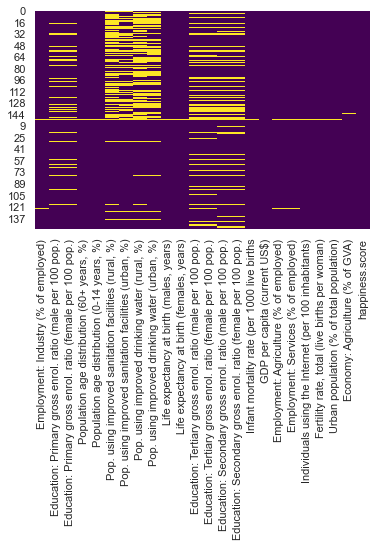

In [110]:
# Yellow represents NULL value
sb.heatmap(final_dataset.isnull(),cbar=False,cmap='viridis')

In [111]:
# Percentage of data missing per column
final_dataset.isnull().mean() * 100

Employment: Industry (% of employed)                              0.662252
Education: Primary gross enrol. ratio (male per 100 pop.)        12.251656
Education: Primary gross enrol. ratio (female per 100 pop.)      12.251656
Population age distribution (60+ years, %)                        0.331126
Population age distribution (0-14 years, %)                       0.331126
Pop. using improved sanitation facilities (rural, %)             30.132450
Pop. using improved sanitation facilities (urban, %)             23.509934
Pop. using improved drinking water (rural, %)                    33.443709
Pop. using improved drinking water (urban, %)                    28.476821
Life expectancy at birth (males, years)                           0.331126
Life expectancy at birth (females, years)                         0.331126
Education: Tertiary gross enrol. ratio (male per 100 pop.)       21.192053
Education: Tertiary gross enrol. ratio (female per 100 pop.)     21.192053
Education: Secondary gros

> Convert dtype to float64

#### Use KNNImputer from Scikit-Learn Library to Fill in Missing Data
> Since the missing data does not exceed 85%, we decided to fill in the missing data with KNNImputer from the scikit-learn library. 

> How it works:  
> KNN is known as k-Nearest Neighbors, it replaces missing values with mean value of the k nearest neighbours using the Euclidean distance metric.

> We chose 17 neighbours as the optimal K value is usually found to be square root of N (number of samples).  
Sqrt(302) = 17.3 ~ 17.

https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb

In [112]:
# Normalise data to fill in missing values (NaN)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
final_dataset = pd.DataFrame(scaler.fit_transform(final_dataset), columns = final_dataset.columns)
final_dataset

,Employment: Industry (% of employed),Education: Primary gross enrol. ratio (male per 100 pop.),Education: Primary gross enrol. ratio (female per 100 pop.),"Population age distribution (60+ years, %)","Population age distribution (0-14 years, %)","Pop. using improved sanitation facilities (rural, %)","Pop. using improved sanitation facilities (urban, %)","Pop. using improved drinking water (rural, %)","Pop. using improved drinking water (urban, %)","Life expectancy at birth (males, years)",...,Education: Secondary gross enrol. ratio (female per 100 pop.),Infant mortality rate (per 1000 live births,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Individuals using the Internet (per 100 inhabitants),"Fertility rate, total (live births per woman)",Urban population (% of total population),Economy: Agriculture (% of GVA),happiness.score
0,0.293333,0.615730,0.317328,0.069620,0.864103,NaN,NaN,0.196771,0.231818,0.443503,...,0.176505,0.612565,0.003927,0.510893,0.358881,0.067427,0.677419,0.179039,0.385593,0.180221
1,0.323810,0.405618,0.565762,0.509494,0.192308,0.486097,0.379121,NaN,NaN,0.847458,...,0.517241,0.079581,0.037294,0.448802,0.409976,0.637967,0.080645,0.534934,0.317797,0.463016
2,0.560000,0.570787,0.625261,0.224684,0.448718,0.208033,0.087912,0.655903,0.767045,0.824859,...,NaN,0.243979,0.039643,0.110022,0.637470,0.377593,0.290323,0.681223,0.170904,0.595014
3,0.133333,0.597753,0.551148,0.056962,0.920513,NaN,NaN,NaN,NaN,0.282486,...,NaN,0.802094,0.039535,0.549020,0.419708,0.109959,0.774194,0.600437,0.128531,0.273805
4,0.420952,0.488764,0.606472,0.414557,0.358974,NaN,0.414286,NaN,NaN,0.762712,...,0.605494,0.109948,0.145723,0.001089,0.849148,0.686722,0.177419,0.907205,0.086158,0.793012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.480000,0.375281,0.474948,0.256329,0.420513,0.690010,0.972527,0.776993,0.943182,0.697740,...,0.504968,0.127749,0.107371,0.127451,0.669100,0.623444,0.193548,0.879913,0.074859,0.522476
298,0.405714,0.465169,0.577244,0.294304,0.305128,0.687951,0.938462,0.968718,0.989773,0.720339,...,NaN,0.185340,0.018904,0.453159,0.351582,0.528008,0.129032,0.275109,0.266949,0.486514
299,0.310476,0.424719,0.373695,0.088608,0.735897,0.321318,0.917582,0.460141,0.681818,0.497175,...,0.192285,0.477487,0.009454,0.356209,0.521898,0.241701,0.516129,0.286026,0.207627,0.183899
300,0.158095,0.397753,0.531315,0.060127,0.861538,0.337796,0.512088,0.508577,0.836364,0.347458,...,NaN,0.546597,0.011466,0.594771,0.352798,0.199170,0.645161,0.354803,0.115819,0.372088


In [113]:
# Fill in missing data (np.nan) with KNNImputer
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors = 17)
final_dataset = pd.DataFrame(impute_knn.fit_transform(final_dataset), columns=final_dataset.columns)

# Invert normalise data transformation
final_dataset = pd.DataFrame(scaler.inverse_transform(final_dataset), columns = final_dataset.columns)

final_dataset

,Employment: Industry (% of employed),Education: Primary gross enrol. ratio (male per 100 pop.),Education: Primary gross enrol. ratio (female per 100 pop.),"Population age distribution (60+ years, %)","Population age distribution (0-14 years, %)","Pop. using improved sanitation facilities (rural, %)","Pop. using improved sanitation facilities (urban, %)","Pop. using improved drinking water (rural, %)","Pop. using improved drinking water (urban, %)","Life expectancy at birth (males, years)",...,Education: Secondary gross enrol. ratio (female per 100 pop.),Infant mortality rate (per 1000 live births,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Individuals using the Internet (per 100 inhabitants),"Fertility rate, total (live births per woman)",Urban population (% of total population),Economy: Agriculture (% of GVA),happiness.score
0,17.0,122.7,83.5,4.0,44.9,24.005882,33.2,20.400000,32.400000,60.9,...,36.800000,60.1,544.0,47.1,35.8,8.3,5.4,24.8,27.3,3.575
1,18.6,104.0,107.3,17.9,18.7,50.100000,43.5,58.870588,85.400000,75.2,...,95.100000,9.2,3939.0,41.4,40.0,63.3,1.7,57.4,22.5,4.959
2,31.0,118.7,113.0,8.9,28.7,23.100000,17.0,65.900000,79.500000,74.4,...,92.311765,24.9,4178.0,10.3,58.7,38.2,3.0,70.8,12.1,5.605
3,8.6,121.1,105.9,3.6,47.1,17.488235,33.4,37.011765,66.811765,55.2,...,40.847059,78.2,4167.0,50.6,40.8,12.4,6.0,63.4,9.1,4.033
4,23.7,111.4,111.2,14.9,25.2,65.994118,46.7,77.464706,91.358824,72.2,...,110.200000,12.1,14971.0,0.3,76.1,68.0,2.3,91.5,6.1,6.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,26.8,101.3,98.6,9.9,27.6,69.900000,97.5,77.900000,95.000000,69.9,...,93.000000,13.8,11068.9,11.9,61.3,61.9,2.4,89.0,5.3,5.250
298,22.9,109.3,108.4,11.1,23.1,69.700000,94.4,96.900000,99.100000,70.7,...,92.382353,19.3,2067.9,41.8,35.2,52.7,2.0,33.6,18.9,5.074
299,17.9,105.7,88.9,4.6,39.9,34.100000,92.5,46.500000,72.000000,62.8,...,39.500000,47.2,1106.4,32.9,49.2,25.1,4.4,34.6,14.7,3.593
300,9.9,103.3,104.0,3.7,44.8,35.700000,55.6,51.300000,85.600000,57.5,...,38.964706,53.8,1311.1,54.8,35.3,21.0,5.2,40.9,8.2,4.514


In [114]:
# Place non numeric columns back into dataframe
final_dataset = pd.concat([final_regions, final_dataset], axis=1)
final_dataset

,country,Region,Employment: Industry (% of employed),Education: Primary gross enrol. ratio (male per 100 pop.),Education: Primary gross enrol. ratio (female per 100 pop.),"Population age distribution (60+ years, %)","Population age distribution (0-14 years, %)","Pop. using improved sanitation facilities (rural, %)","Pop. using improved sanitation facilities (urban, %)","Pop. using improved drinking water (rural, %)",...,Education: Secondary gross enrol. ratio (female per 100 pop.),Infant mortality rate (per 1000 live births,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Individuals using the Internet (per 100 inhabitants),"Fertility rate, total (live births per woman)",Urban population (% of total population),Economy: Agriculture (% of GVA),happiness.score
0,Afghanistan,SouthernAsia,17.0,122.7,83.5,4.0,44.9,24.005882,33.2,20.400000,...,36.800000,60.1,544.0,47.1,35.8,8.3,5.4,24.8,27.3,3.575
1,Albania,SouthernEurope,18.6,104.0,107.3,17.9,18.7,50.100000,43.5,58.870588,...,95.100000,9.2,3939.0,41.4,40.0,63.3,1.7,57.4,22.5,4.959
2,Algeria,NorthernAfrica,31.0,118.7,113.0,8.9,28.7,23.100000,17.0,65.900000,...,92.311765,24.9,4178.0,10.3,58.7,38.2,3.0,70.8,12.1,5.605
3,Angola,MiddleAfrica,8.6,121.1,105.9,3.6,47.1,17.488235,33.4,37.011765,...,40.847059,78.2,4167.0,50.6,40.8,12.4,6.0,63.4,9.1,4.033
4,Argentina,SouthAmerica,23.7,111.4,111.2,14.9,25.2,65.994118,46.7,77.464706,...,110.200000,12.1,14971.0,0.3,76.1,68.0,2.3,91.5,6.1,6.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,Venezuela,SouthAmerica,26.8,101.3,98.6,9.9,27.6,69.900000,97.5,77.900000,...,93.000000,13.8,11068.9,11.9,61.3,61.9,2.4,89.0,5.3,5.250
298,Vietnam,South-easternAsia,22.9,109.3,108.4,11.1,23.1,69.700000,94.4,96.900000,...,92.382353,19.3,2067.9,41.8,35.2,52.7,2.0,33.6,18.9,5.074
299,Yemen,WesternAsia,17.9,105.7,88.9,4.6,39.9,34.100000,92.5,46.500000,...,39.500000,47.2,1106.4,32.9,49.2,25.1,4.4,34.6,14.7,3.593
300,Zambia,EasternAfrica,9.9,103.3,104.0,3.7,44.8,35.700000,55.6,51.300000,...,38.964706,53.8,1311.1,54.8,35.3,21.0,5.2,40.9,8.2,4.514


In [115]:
# Check that there are no null values left
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 26 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   country                                                        302 non-null    object 
 1   Region                                                         302 non-null    object 
 2   Employment: Industry (% of employed)                           302 non-null    float64
 3   Education: Primary gross enrol. ratio (male per 100 pop.)      302 non-null    float64
 4   Education: Primary gross enrol. ratio (female per 100 pop.)    302 non-null    float64
 5   Population age distribution (60+ years, %)                     302 non-null    float64
 6   Population age distribution (0-14 years, %)                    302 non-null    float64
 7   Pop. using improved sanitation facilities (rural, %)          

<AxesSubplot:>

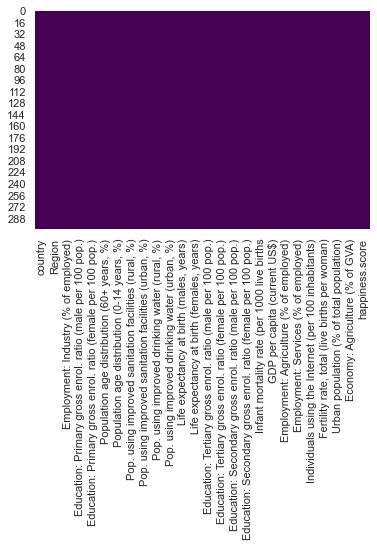

In [116]:
# Check that there are no null values left
sb.heatmap(final_dataset.isnull(),cbar=False,cmap='viridis')

#### Use Nominatim from Geopy Library to Retrieve Longitude and Latitude of each country
> As we want to display the happiness score on a world map, we require the longitude and latitude of each country.  
> This process might take awhile (around 1 minute) as the function would have to retrieve the longitude and latitude of every country.  
> To speed up this process, we only query for the longitude and latitude once by identifying the unique country names with `unique()` and map it to the final dataset afterwards.

In [117]:
# queries for longitude and latitude data and stores it into a dictionary {'country': (latitude, longitude)}
from geopy.geocoders import Nominatim
final_dataset['country'].unique()

geolocation = {}

geolocator = Nominatim(user_agent="test")
print("Running...")
print("Geolocation not found: ")
for i in final_dataset['country'].unique():
    loc = geolocator.geocode(i)
    if loc == None:
        print(i)
        continue
    geolocation[i] = loc.latitude, loc.longitude
print("Done.")

Running...
Geolocation not found: 
Hong Kong S.A.R., China
Done.


In [118]:
geolocation

{'Afghanistan': (33.7680065, 66.2385139),
 'Albania': (41.000028, 19.9999619),
 'Algeria': (28.0000272, 2.9999825),
 'Angola': (-11.8775768, 17.5691241),
 'Argentina': (-34.9964963, -64.9672817),
 'Armenia': (40.7696272, 44.6736646),
 'Australia': (-24.7761086, 134.755),
 'Austria': (47.59397, 14.12456),
 'Azerbaijan': (40.3936294, 47.7872508),
 'Bahrain': (26.1551249, 50.5344606),
 'Bangladesh': (24.4769288, 90.2934413),
 'Belarus': (53.4250605, 27.6971358),
 'Belgium': (50.6402809, 4.6667145),
 'Benin': (9.5293472, 2.2584408),
 'Bhutan': (27.549511, 90.5119273),
 'Bolivia': (-17.0568696, -64.9912286),
 'Bosnia and Herzegovina': (44.3053476, 17.5961467),
 'Botswana': (-23.1681782, 24.5928742),
 'Brazil': (-10.3333333, -53.2),
 'Bulgaria': (42.6073975, 25.4856617),
 'Burkina Faso': (12.0753083, -1.6880314),
 'Burundi': (-3.426449, 29.9324519),
 'Cambodia': (13.5066394, 104.869423),
 'Cameroon': (4.6125522, 13.1535811),
 'Canada': (61.0666922, -107.991707),
 'Chad': (15.6134137, 19.0156

In [119]:
# map latitude and longitude data to final_dataset dataframe with 'country' variable.
final_dataset["latitudelongitude"] = final_dataset["country"].map(geolocation)
final_dataset

,country,Region,Employment: Industry (% of employed),Education: Primary gross enrol. ratio (male per 100 pop.),Education: Primary gross enrol. ratio (female per 100 pop.),"Population age distribution (60+ years, %)","Population age distribution (0-14 years, %)","Pop. using improved sanitation facilities (rural, %)","Pop. using improved sanitation facilities (urban, %)","Pop. using improved drinking water (rural, %)",...,Infant mortality rate (per 1000 live births,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Individuals using the Internet (per 100 inhabitants),"Fertility rate, total (live births per woman)",Urban population (% of total population),Economy: Agriculture (% of GVA),happiness.score,latitudelongitude
0,Afghanistan,SouthernAsia,17.0,122.7,83.5,4.0,44.9,24.005882,33.2,20.400000,...,60.1,544.0,47.1,35.8,8.3,5.4,24.8,27.3,3.575,"(33.7680065, 66.2385139)"
1,Albania,SouthernEurope,18.6,104.0,107.3,17.9,18.7,50.100000,43.5,58.870588,...,9.2,3939.0,41.4,40.0,63.3,1.7,57.4,22.5,4.959,"(41.000028, 19.9999619)"
2,Algeria,NorthernAfrica,31.0,118.7,113.0,8.9,28.7,23.100000,17.0,65.900000,...,24.9,4178.0,10.3,58.7,38.2,3.0,70.8,12.1,5.605,"(28.0000272, 2.9999825)"
3,Angola,MiddleAfrica,8.6,121.1,105.9,3.6,47.1,17.488235,33.4,37.011765,...,78.2,4167.0,50.6,40.8,12.4,6.0,63.4,9.1,4.033,"(-11.8775768, 17.5691241)"
4,Argentina,SouthAmerica,23.7,111.4,111.2,14.9,25.2,65.994118,46.7,77.464706,...,12.1,14971.0,0.3,76.1,68.0,2.3,91.5,6.1,6.574,"(-34.9964963, -64.9672817)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,Venezuela,SouthAmerica,26.8,101.3,98.6,9.9,27.6,69.900000,97.5,77.900000,...,13.8,11068.9,11.9,61.3,61.9,2.4,89.0,5.3,5.250,"(8.0018709, -66.1109318)"
298,Vietnam,South-easternAsia,22.9,109.3,108.4,11.1,23.1,69.700000,94.4,96.900000,...,19.3,2067.9,41.8,35.2,52.7,2.0,33.6,18.9,5.074,"(13.2904027, 108.4265113)"
299,Yemen,WesternAsia,17.9,105.7,88.9,4.6,39.9,34.100000,92.5,46.500000,...,47.2,1106.4,32.9,49.2,25.1,4.4,34.6,14.7,3.593,"(16.3471243, 47.8915271)"
300,Zambia,EasternAfrica,9.9,103.3,104.0,3.7,44.8,35.700000,55.6,51.300000,...,53.8,1311.1,54.8,35.3,21.0,5.2,40.9,8.2,4.514,"(-14.5189121, 27.5589884)"


In [120]:
# split (latitude, longitude) tuple into two variables
final_dataset[['latitude', 'longitude']] = pd.DataFrame(final_dataset['latitudelongitude'].tolist(), index=final_dataset.index)
final_dataset = final_dataset.drop('latitudelongitude', axis=1)
final_dataset

,country,Region,Employment: Industry (% of employed),Education: Primary gross enrol. ratio (male per 100 pop.),Education: Primary gross enrol. ratio (female per 100 pop.),"Population age distribution (60+ years, %)","Population age distribution (0-14 years, %)","Pop. using improved sanitation facilities (rural, %)","Pop. using improved sanitation facilities (urban, %)","Pop. using improved drinking water (rural, %)",...,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Individuals using the Internet (per 100 inhabitants),"Fertility rate, total (live births per woman)",Urban population (% of total population),Economy: Agriculture (% of GVA),happiness.score,latitude,longitude
0,Afghanistan,SouthernAsia,17.0,122.7,83.5,4.0,44.9,24.005882,33.2,20.400000,...,544.0,47.1,35.8,8.3,5.4,24.8,27.3,3.575,33.768006,66.238514
1,Albania,SouthernEurope,18.6,104.0,107.3,17.9,18.7,50.100000,43.5,58.870588,...,3939.0,41.4,40.0,63.3,1.7,57.4,22.5,4.959,41.000028,19.999962
2,Algeria,NorthernAfrica,31.0,118.7,113.0,8.9,28.7,23.100000,17.0,65.900000,...,4178.0,10.3,58.7,38.2,3.0,70.8,12.1,5.605,28.000027,2.999983
3,Angola,MiddleAfrica,8.6,121.1,105.9,3.6,47.1,17.488235,33.4,37.011765,...,4167.0,50.6,40.8,12.4,6.0,63.4,9.1,4.033,-11.877577,17.569124
4,Argentina,SouthAmerica,23.7,111.4,111.2,14.9,25.2,65.994118,46.7,77.464706,...,14971.0,0.3,76.1,68.0,2.3,91.5,6.1,6.574,-34.996496,-64.967282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,Venezuela,SouthAmerica,26.8,101.3,98.6,9.9,27.6,69.900000,97.5,77.900000,...,11068.9,11.9,61.3,61.9,2.4,89.0,5.3,5.250,8.001871,-66.110932
298,Vietnam,South-easternAsia,22.9,109.3,108.4,11.1,23.1,69.700000,94.4,96.900000,...,2067.9,41.8,35.2,52.7,2.0,33.6,18.9,5.074,13.290403,108.426511
299,Yemen,WesternAsia,17.9,105.7,88.9,4.6,39.9,34.100000,92.5,46.500000,...,1106.4,32.9,49.2,25.1,4.4,34.6,14.7,3.593,16.347124,47.891527
300,Zambia,EasternAfrica,9.9,103.3,104.0,3.7,44.8,35.700000,55.6,51.300000,...,1311.1,54.8,35.3,21.0,5.2,40.9,8.2,4.514,-14.518912,27.558988


In [121]:
# identify missing data
final_dataset[final_dataset['latitude'].isna()]

,country,Region,Employment: Industry (% of employed),Education: Primary gross enrol. ratio (male per 100 pop.),Education: Primary gross enrol. ratio (female per 100 pop.),"Population age distribution (60+ years, %)","Population age distribution (0-14 years, %)","Pop. using improved sanitation facilities (rural, %)","Pop. using improved sanitation facilities (urban, %)","Pop. using improved drinking water (rural, %)",...,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Individuals using the Internet (per 100 inhabitants),"Fertility rate, total (live births per woman)",Urban population (% of total population),Economy: Agriculture (% of GVA),happiness.score,latitude,longitude
180,"Hong Kong S.A.R., China",EasternAsia,14.9,102.723529,102.905882,23.5,11.5,99.123529,97.594118,99.047059,...,42431.0,0.2,84.9,84.9,1.2,100.0,0.1,5.472,NaN,NaN


In [122]:
# Since Hong Kong is the only one that does not have latitude and longitude information, we will manually add it in.
final_dataset.at[180, 'latitude']= 22.3193
final_dataset.at[180, 'longitude']= 114.1694
final_dataset

,country,Region,Employment: Industry (% of employed),Education: Primary gross enrol. ratio (male per 100 pop.),Education: Primary gross enrol. ratio (female per 100 pop.),"Population age distribution (60+ years, %)","Population age distribution (0-14 years, %)","Pop. using improved sanitation facilities (rural, %)","Pop. using improved sanitation facilities (urban, %)","Pop. using improved drinking water (rural, %)",...,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Individuals using the Internet (per 100 inhabitants),"Fertility rate, total (live births per woman)",Urban population (% of total population),Economy: Agriculture (% of GVA),happiness.score,latitude,longitude
0,Afghanistan,SouthernAsia,17.0,122.7,83.5,4.0,44.9,24.005882,33.2,20.400000,...,544.0,47.1,35.8,8.3,5.4,24.8,27.3,3.575,33.768006,66.238514
1,Albania,SouthernEurope,18.6,104.0,107.3,17.9,18.7,50.100000,43.5,58.870588,...,3939.0,41.4,40.0,63.3,1.7,57.4,22.5,4.959,41.000028,19.999962
2,Algeria,NorthernAfrica,31.0,118.7,113.0,8.9,28.7,23.100000,17.0,65.900000,...,4178.0,10.3,58.7,38.2,3.0,70.8,12.1,5.605,28.000027,2.999983
3,Angola,MiddleAfrica,8.6,121.1,105.9,3.6,47.1,17.488235,33.4,37.011765,...,4167.0,50.6,40.8,12.4,6.0,63.4,9.1,4.033,-11.877577,17.569124
4,Argentina,SouthAmerica,23.7,111.4,111.2,14.9,25.2,65.994118,46.7,77.464706,...,14971.0,0.3,76.1,68.0,2.3,91.5,6.1,6.574,-34.996496,-64.967282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,Venezuela,SouthAmerica,26.8,101.3,98.6,9.9,27.6,69.900000,97.5,77.900000,...,11068.9,11.9,61.3,61.9,2.4,89.0,5.3,5.250,8.001871,-66.110932
298,Vietnam,South-easternAsia,22.9,109.3,108.4,11.1,23.1,69.700000,94.4,96.900000,...,2067.9,41.8,35.2,52.7,2.0,33.6,18.9,5.074,13.290403,108.426511
299,Yemen,WesternAsia,17.9,105.7,88.9,4.6,39.9,34.100000,92.5,46.500000,...,1106.4,32.9,49.2,25.1,4.4,34.6,14.7,3.593,16.347124,47.891527
300,Zambia,EasternAfrica,9.9,103.3,104.0,3.7,44.8,35.700000,55.6,51.300000,...,1311.1,54.8,35.3,21.0,5.2,40.9,8.2,4.514,-14.518912,27.558988


<AxesSubplot:>

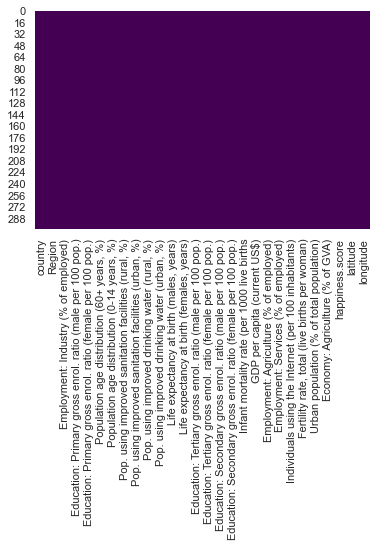

In [123]:
# Check that there are no null values left
sb.heatmap(final_dataset.isnull(),cbar=False,cmap='viridis')

#### Final Dataset
> Export `dataset.csv` for easier usage on EDA and ML.

In [124]:
final_dataset

,country,Region,Employment: Industry (% of employed),Education: Primary gross enrol. ratio (male per 100 pop.),Education: Primary gross enrol. ratio (female per 100 pop.),"Population age distribution (60+ years, %)","Population age distribution (0-14 years, %)","Pop. using improved sanitation facilities (rural, %)","Pop. using improved sanitation facilities (urban, %)","Pop. using improved drinking water (rural, %)",...,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Individuals using the Internet (per 100 inhabitants),"Fertility rate, total (live births per woman)",Urban population (% of total population),Economy: Agriculture (% of GVA),happiness.score,latitude,longitude
0,Afghanistan,SouthernAsia,17.0,122.7,83.5,4.0,44.9,24.005882,33.2,20.400000,...,544.0,47.1,35.8,8.3,5.4,24.8,27.3,3.575,33.768006,66.238514
1,Albania,SouthernEurope,18.6,104.0,107.3,17.9,18.7,50.100000,43.5,58.870588,...,3939.0,41.4,40.0,63.3,1.7,57.4,22.5,4.959,41.000028,19.999962
2,Algeria,NorthernAfrica,31.0,118.7,113.0,8.9,28.7,23.100000,17.0,65.900000,...,4178.0,10.3,58.7,38.2,3.0,70.8,12.1,5.605,28.000027,2.999983
3,Angola,MiddleAfrica,8.6,121.1,105.9,3.6,47.1,17.488235,33.4,37.011765,...,4167.0,50.6,40.8,12.4,6.0,63.4,9.1,4.033,-11.877577,17.569124
4,Argentina,SouthAmerica,23.7,111.4,111.2,14.9,25.2,65.994118,46.7,77.464706,...,14971.0,0.3,76.1,68.0,2.3,91.5,6.1,6.574,-34.996496,-64.967282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,Venezuela,SouthAmerica,26.8,101.3,98.6,9.9,27.6,69.900000,97.5,77.900000,...,11068.9,11.9,61.3,61.9,2.4,89.0,5.3,5.250,8.001871,-66.110932
298,Vietnam,South-easternAsia,22.9,109.3,108.4,11.1,23.1,69.700000,94.4,96.900000,...,2067.9,41.8,35.2,52.7,2.0,33.6,18.9,5.074,13.290403,108.426511
299,Yemen,WesternAsia,17.9,105.7,88.9,4.6,39.9,34.100000,92.5,46.500000,...,1106.4,32.9,49.2,25.1,4.4,34.6,14.7,3.593,16.347124,47.891527
300,Zambia,EasternAfrica,9.9,103.3,104.0,3.7,44.8,35.700000,55.6,51.300000,...,1311.1,54.8,35.3,21.0,5.2,40.9,8.2,4.514,-14.518912,27.558988


In [125]:
final_dataset.to_csv("Dataset.csv", index=False)